## Making Voronoi Diagrams
Making Voronoi Diagrams with Statsbomb 360 data

In [1]:
from mplsoccer import Sbopen, VerticalPitch
import numpy as np
import matplotlib.pyplot as plt

# The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.

### Opening data
For this task use Statsbomb 360 data form the Sweden against Switzerland game at the Women’s UEFA Euro 2022. First, make the plot for Bennison’s goal from that game. Identify the id of this event. As the next step open the 360 data. Within the 360 data, the df_frame stores player location data, and df_visible stores areas tracked by Statsbomb during the match. From the latter take the visible area only for this specific event, and store it as a numpy array with apeces coordinates stored in separate rows.

In [2]:
# Instantiate mplsoccer parser
parser = Sbopen()

# open the event dataset for the game (i.e. 3835331)
df_event = parser.event(3835331)[0]
df_event.sample(3)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_offensive,foul_won_defensive,block_offensive,foul_committed_advantage,foul_won_advantage,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,block_save_block,dribble_nutmeg
2752,ed018b72-fd06-43f6-8d73-324df4191522,2753,2,00:28:04,73,4,175,0.301028,3835331,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,6589743c-816d-4518-9f7c-292272515606,2060,2,00:07:08,52,8,138,NaN,3835331,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1682,e6af8737-0578-4e71-9abd-68c03424f54b,1683,1,00:45:38,45,38,112,NaN,3835331,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# find Bennison goal
event = (df_event
         .query("outcome_name == 'Goal' and player_name == 'Hanna Ulrika Bennison'")
        #  .loc[df_event["outcome_name"] == 'Goal']
        #  .loc[df_event["player_name"] == 'Hanna Ulrika Bennison']
         )
# save it's id
event_id = event["id"].iloc[0]
event_id

'add42adc-73cf-4e98-b712-6f5020ce74ce'

In [4]:
# open 360
df_frame, df_visible = parser.frame(3835331)
# get visible area
visible_area = (np.array(df_visible
                         .loc[lambda df: df["id"] == event_id]['visible_area']
                         .iloc[0])
                         .reshape(-1, 2)
                )
visible_area

array([[ 99.2288161 ,  68.48130216],
       [ 77.58975181,  54.10357966],
       [102.61304498,   0.        ],
       [120.        ,   0.        ],
       [120.        ,  48.45396715],
       [ 99.2288161 ,  68.48130216]])

### Plotting visible area
To investigate the area that Statsbomb managed to catch, plot it using polygon method of mplsoccer.

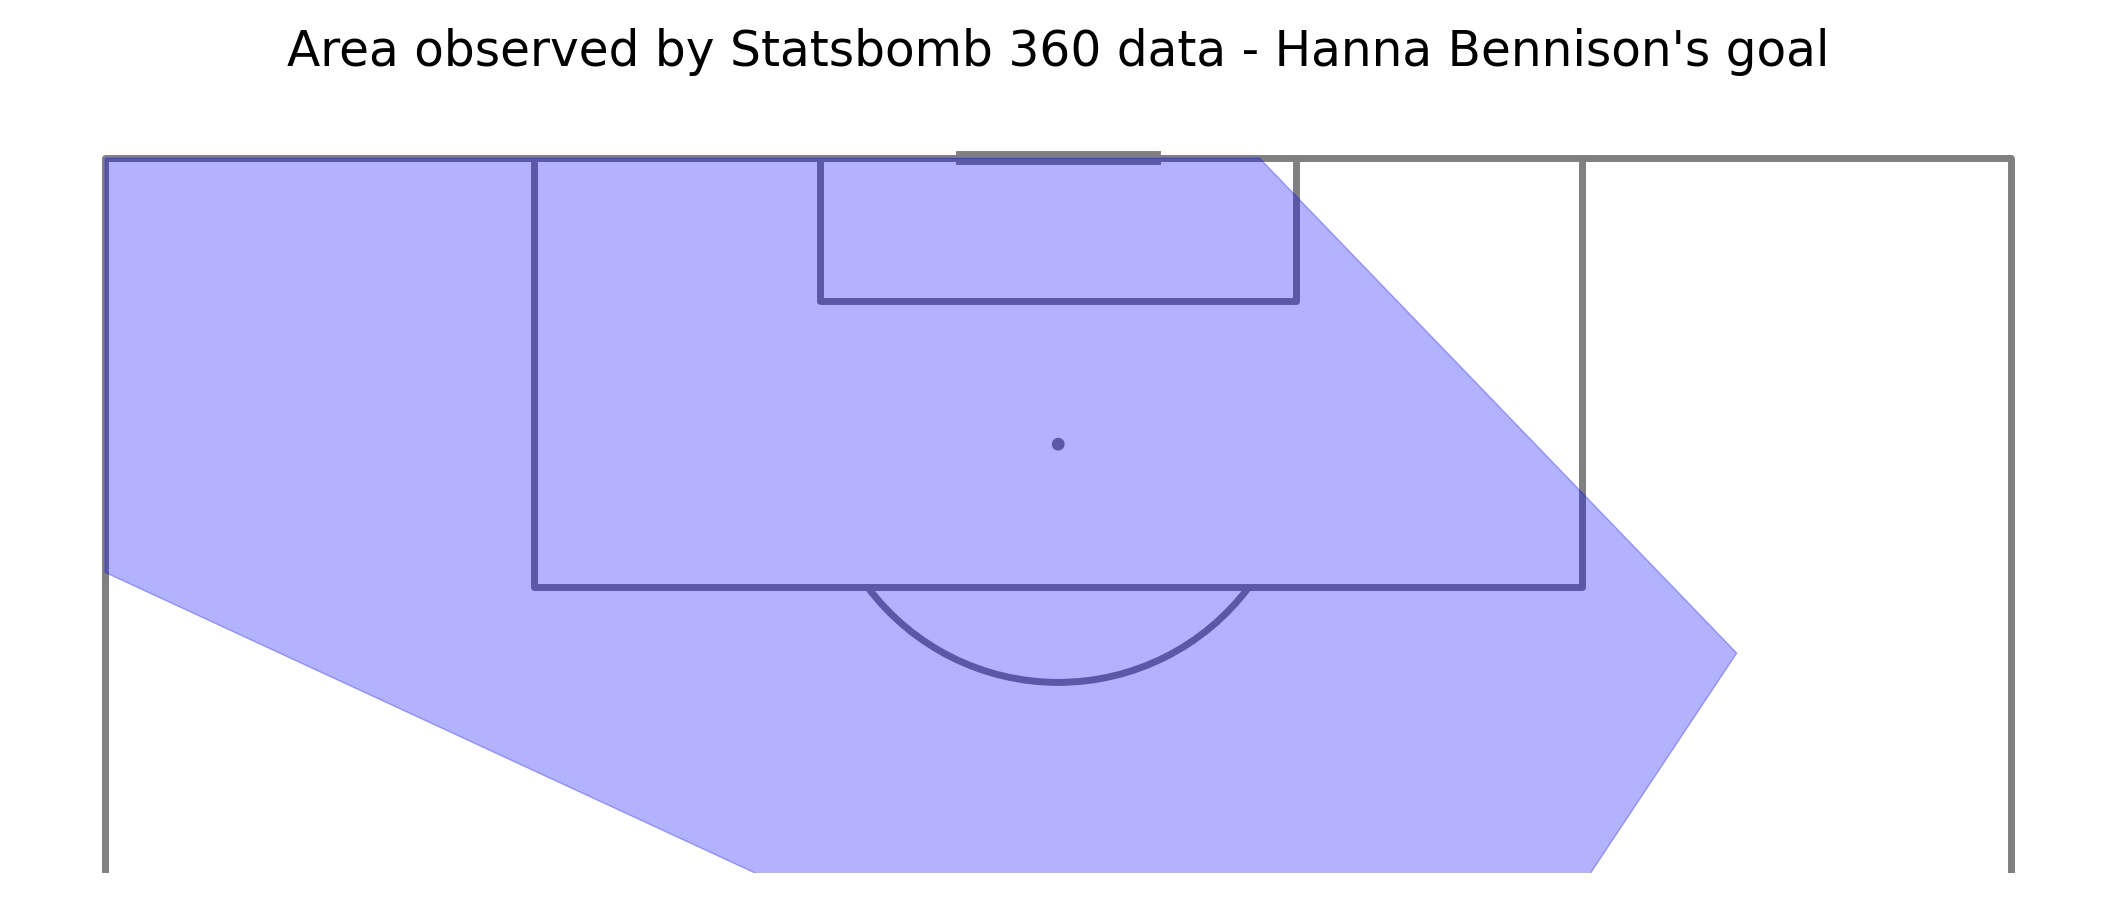

In [5]:
pitch  = VerticalPitch(line_color='grey', line_zorder = 1, half = True, pad_bottom=-30, linewidth=5)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
# add visible area
pitch.polygon([visible_area], color=(0, 0, 1, 0.3), ax=ax["pitch"], zorder = 2)
fig.suptitle("Area observed by Statsbomb 360 data - Hanna Bennison's goal", fontsize = 35)
plt.show()

### Plotting player position
To get a better understanding of Statsbomb 360 data plot player position during the shot as well as shot trajectory.

In [6]:
# get all player position for this event
player_position = df_frame.loc[lambda df_: df_["id"] == event_id]
# get swedish player position
sweden = player_position.loc[lambda df_:df_["teammate"] == True]
# get swiss player positions
swiss = player_position.loc[lambda df_:df_["teammate"] == False]

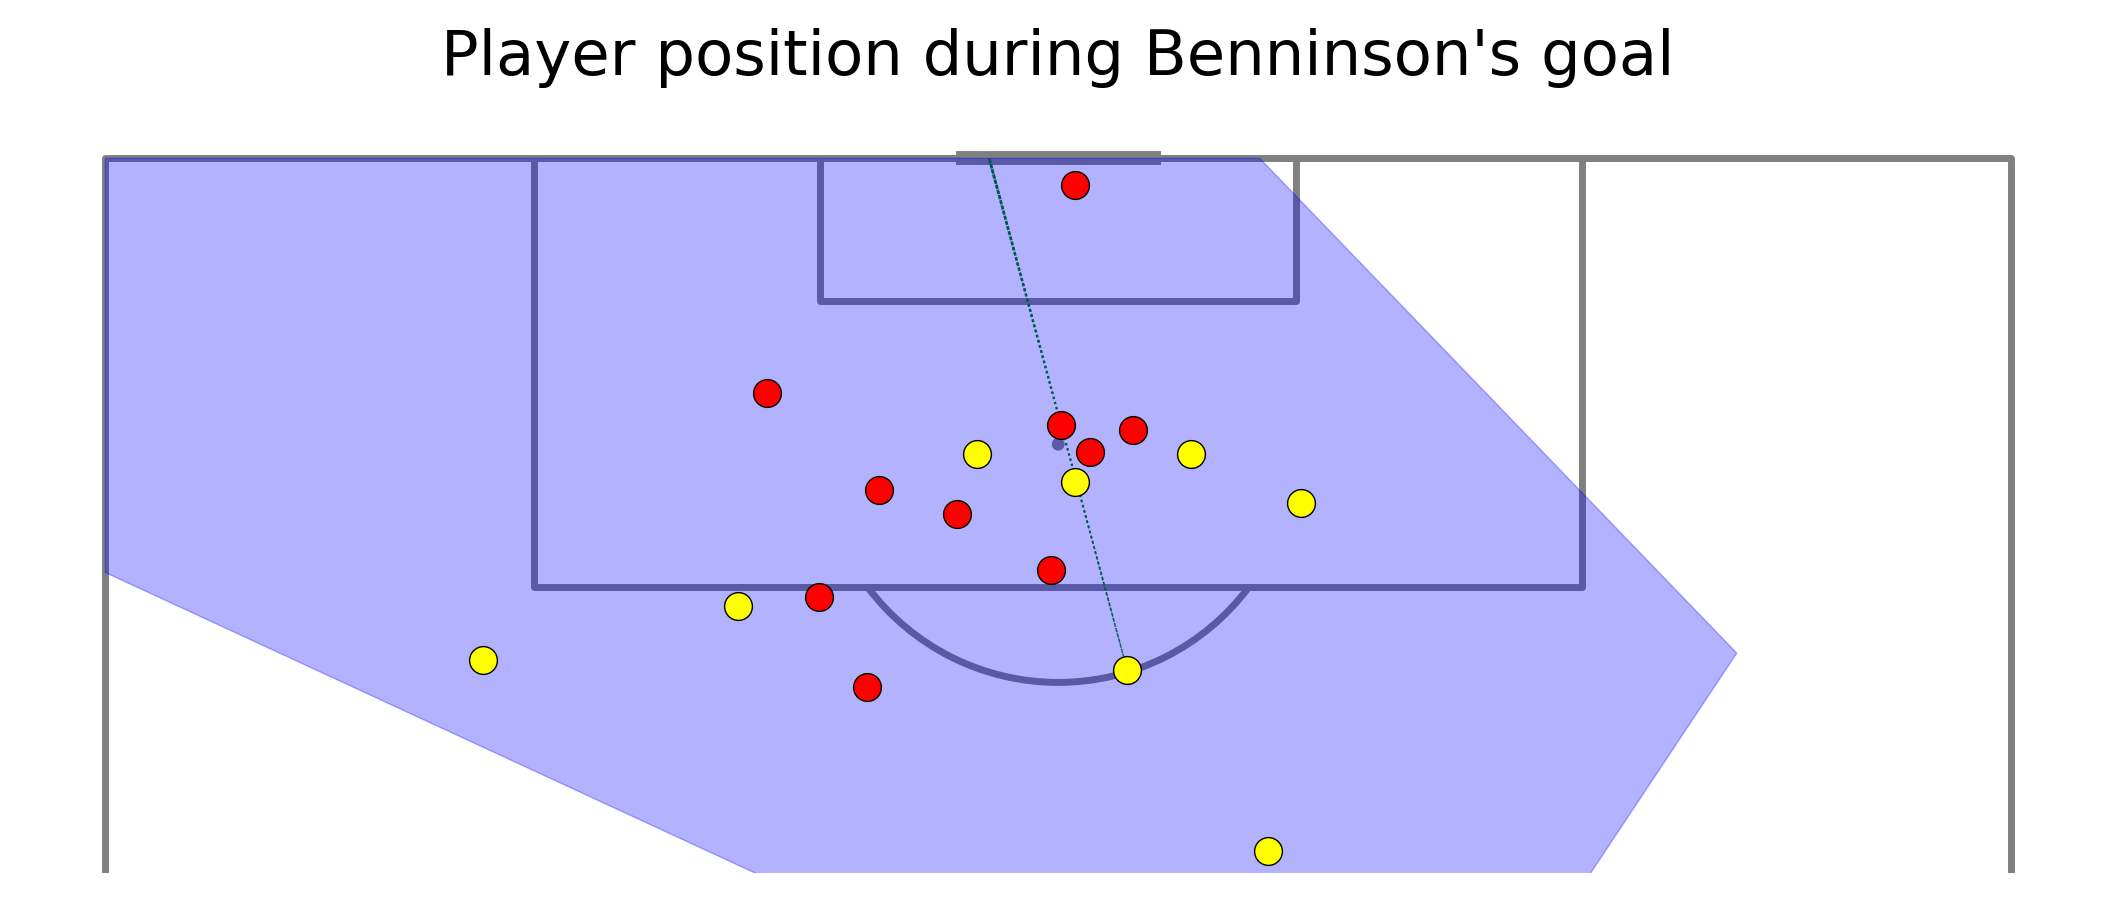

In [7]:
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# plot visible area
pitch.polygon([visible_area], color=(0, 0, 1, 0.3), ax=ax["pitch"], zorder = 2)
# plot sweden players - yellow
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
# plot swiss players - red
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 400, ax=ax['pitch'], zorder = 3)
# add shot
pitch.lines(event.x, event.y,event.end_x, event.end_y, 
            comet = True, color='green', ax=ax['pitch'], 
            zorder = 1, linestyle = ':', lw = 2)

fig.suptitle("Player position during Benninson's goal", fontsize = 45)
plt.show()

### Plotting Voronoi diagrams for 1 team
Make Voronoi diagrams for the Swedish team. This will be done using voronoi method. Then, clip the diagram to the restricted area only since players in the other areas will affect pitch control.

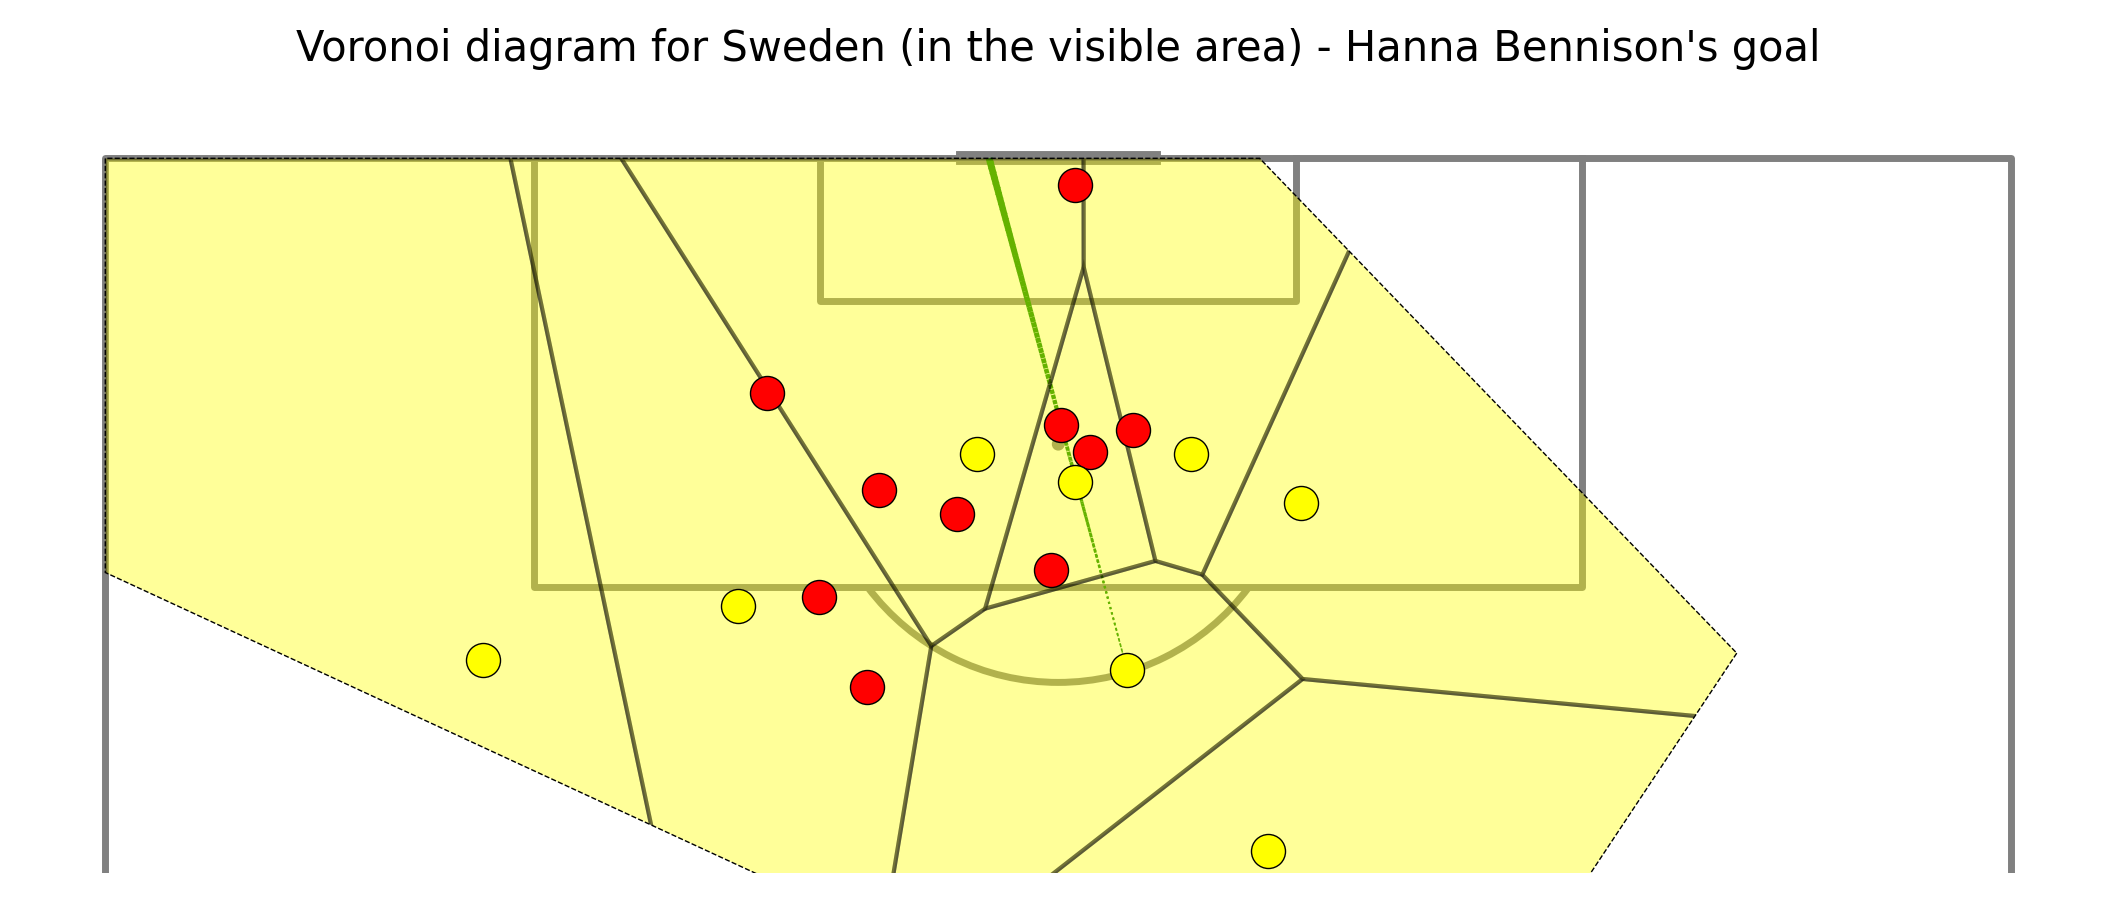

In [8]:
# Voronoi data for Sweden
team1, team2 = pitch.voronoi(sweden.x, sweden.y,sweden.teammate)

# figure for plot
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# plot voronoi diagrams as polygons
t1 = pitch.polygon(team1, ax = ax["pitch"], color = 'yellow', ec = 'black', lw=3, alpha=0.4, zorder = 2)
# mark visible area
visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)
# plot swedish players
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 4)
# plot swiss players
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 3)
# plot shot
pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 5)

# limit voronoi diagram to polygon
for p1 in t1:
    p1.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for Sweden (in the visible area) - Hanna Bennison's goal", fontsize = 30)
plt.show()

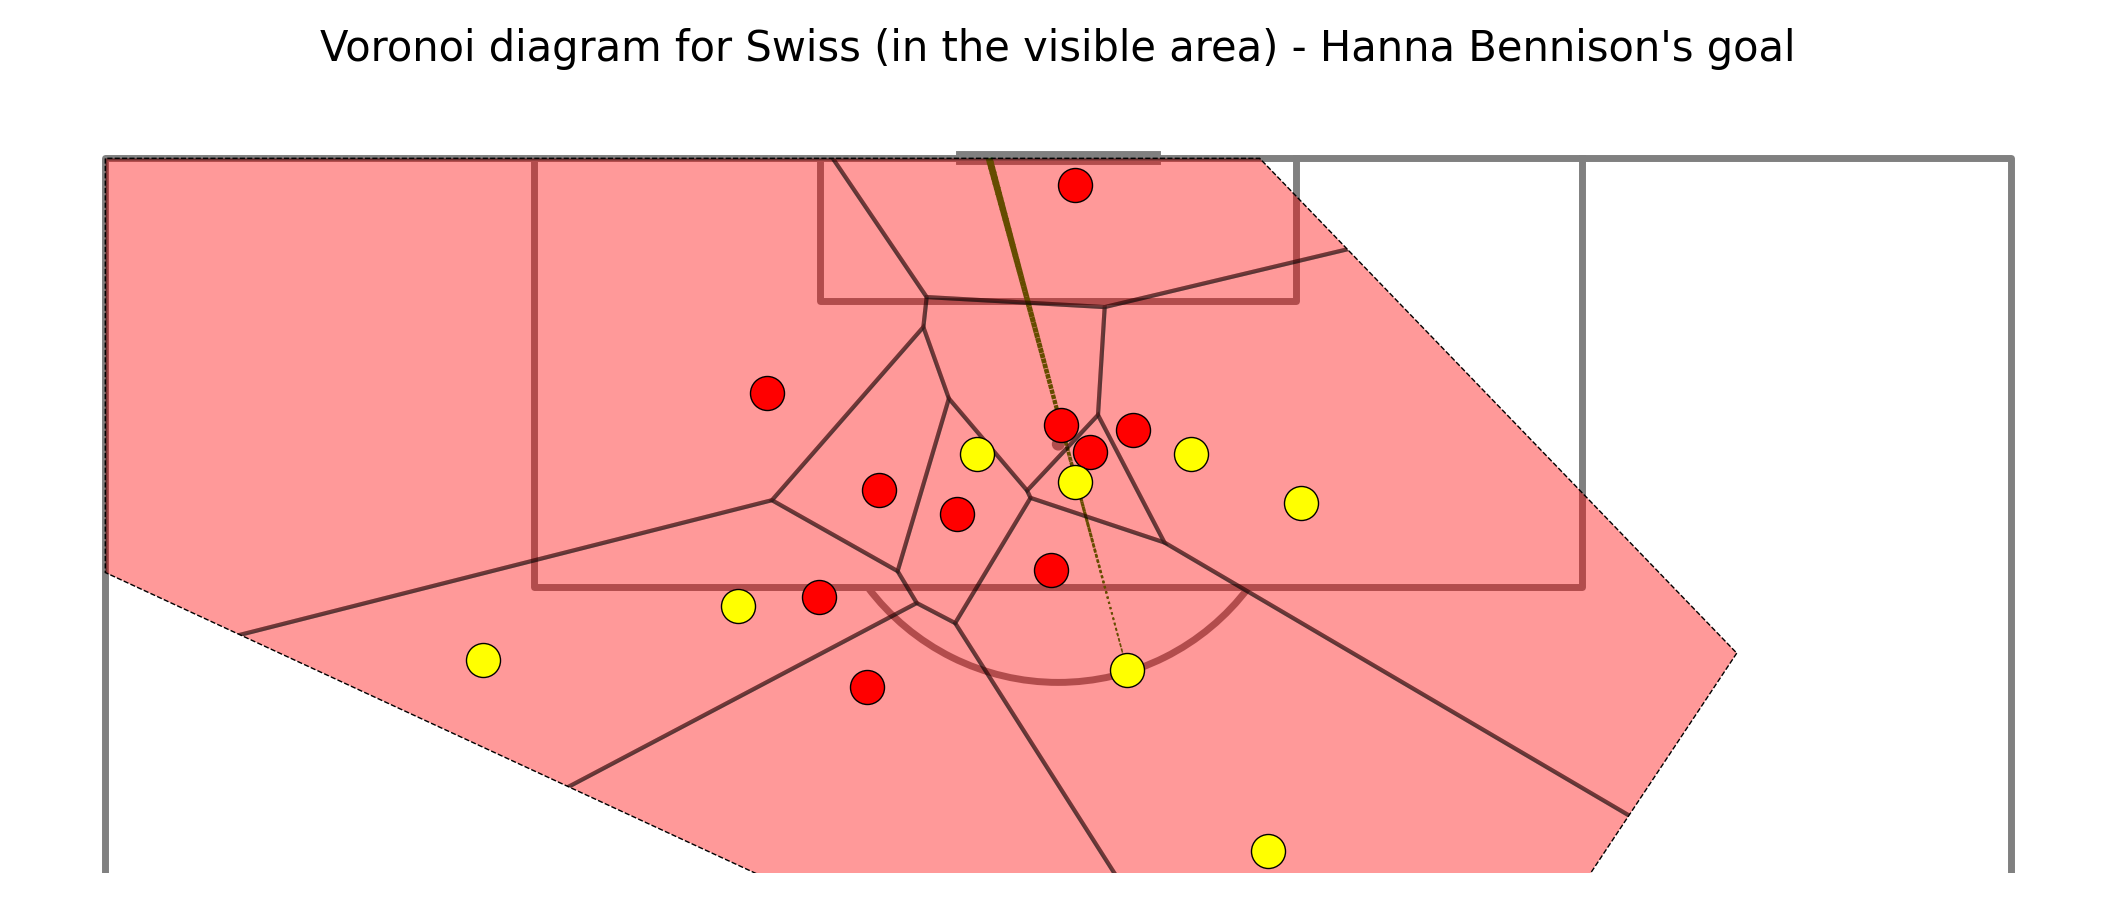

In [9]:
# Voronoi data for Swiss
team1, team2 = pitch.voronoi(swiss.x, swiss.y, swiss.teammate)

# figure for plot
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# plot voronoi diagrams as polygons
t1 = pitch.polygon(team2, ax = ax["pitch"], color = 'red', ec = 'black', lw=3, alpha=0.4, zorder = 2)
# mark visible area
visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)
# plot swedish players
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 4)
# plot swiss players
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 3)
# plot shot
pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 5)

# limit voronoi diagram to polygon
for p1 in t1:
    p1.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for Swiss (in the visible area) - Hanna Bennison's goal", fontsize = 30)
plt.show()

### Plotting Voronoi diagrams for both teams
Differentiation between areas can be accomplish allowing marking of areas that each player was the closest to at the moment in question. To do this a dataframe with both teams players’ positions is applied.

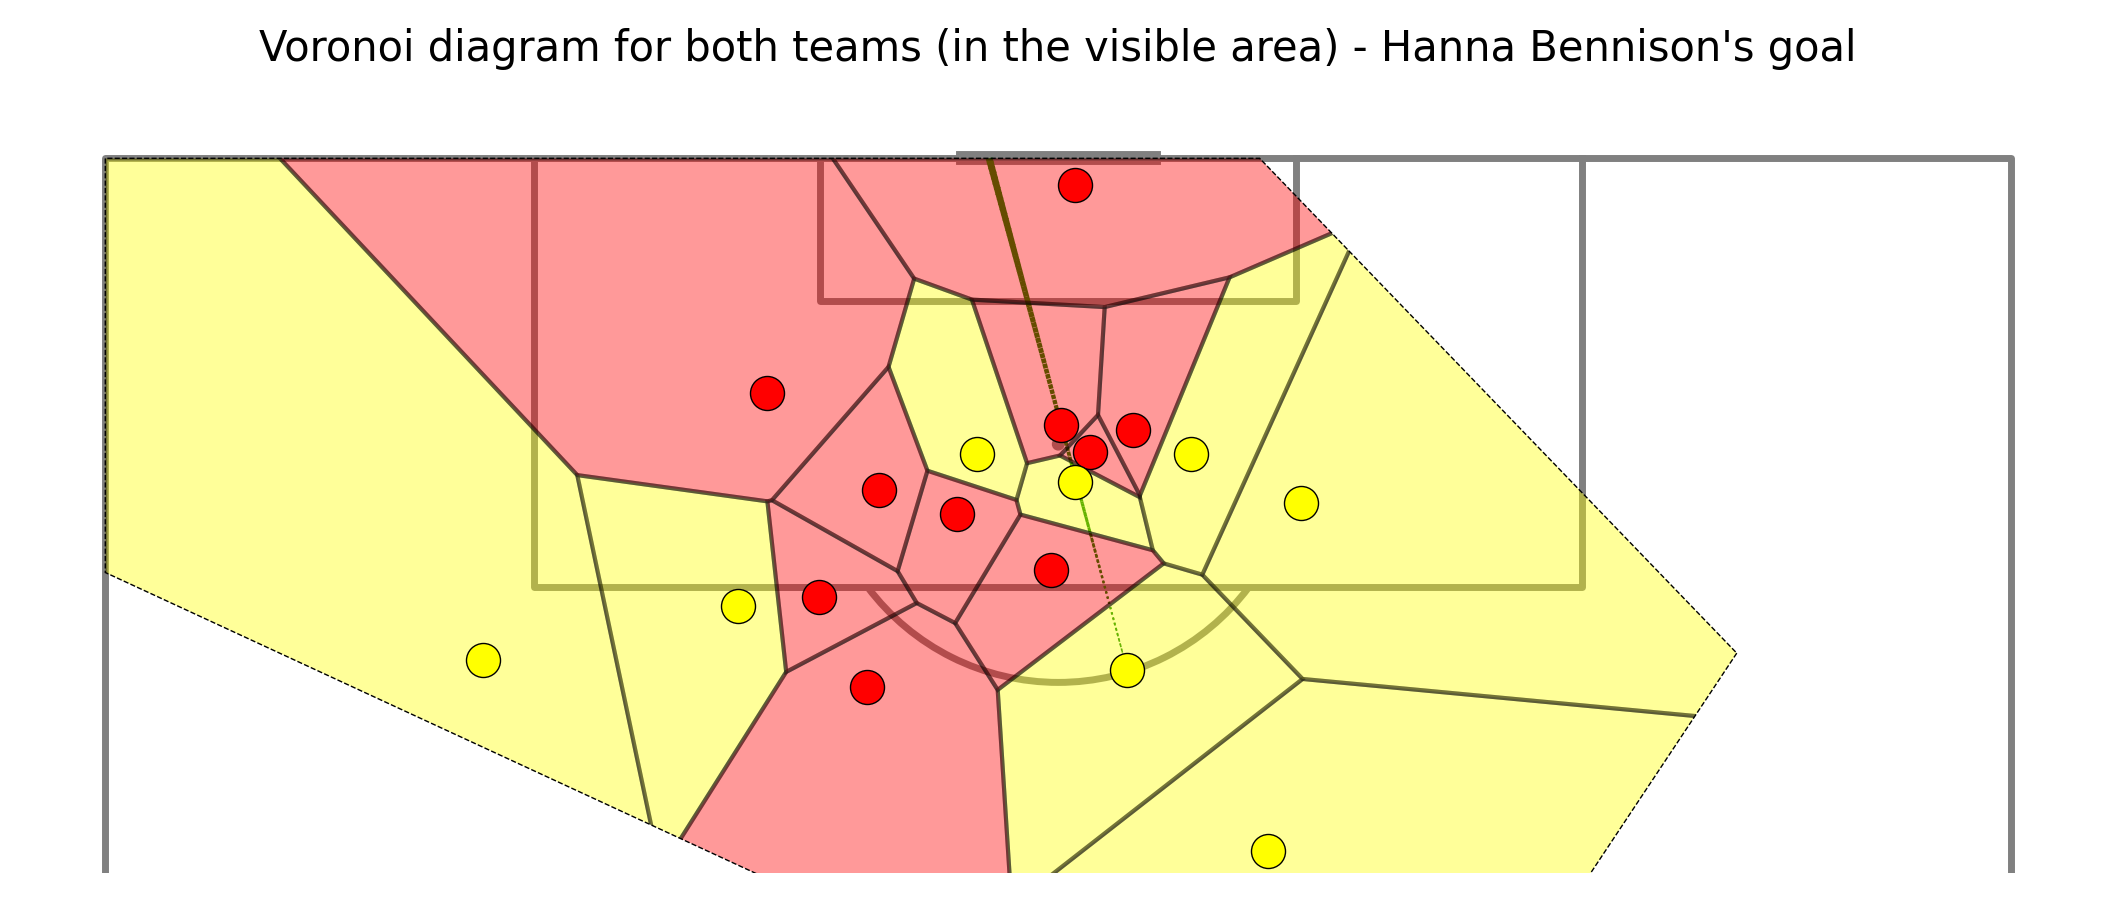

In [10]:
# voronoi for both teams using player_position dataframe
team1, team2 = pitch.voronoi(player_position.x, player_position.y,
                         player_position.teammate)

# figure creation for plot
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# add sweden, team 1 or the true case
t1 = pitch.polygon(team1, ax = ax["pitch"], color = 'yellow', ec = 'black', lw=3, alpha=0.4, zorder = 2)
# add switzerland, team 2 or the false case
t2 = pitch.polygon(team2, ax = ax["pitch"], color = 'red', ec = 'black', lw=3, alpha=0.4, zorder = 2)
# mark visible area
visible = pitch.polygon([visible_area], color = 'None', linestyle = "--", ec = "black", ax=ax["pitch"], zorder = 2)
# plot swedish players
pitch.scatter(sweden.x, sweden.y, color = 'yellow', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 4)
# plot swiss players
pitch.scatter(swiss.x, swiss.y, color = 'red', edgecolors = 'black', s = 600, ax=ax['pitch'], zorder = 3)
# plot shot
pitch.lines(event.x, event.y,
                   event.end_x, event.end_y, comet = True, color='green', ax=ax['pitch'], zorder = 1, linestyle = ':', lw = 5)

# clip sweden
for p1 in t1:
    p1.set_clip_path(visible[0])
#clip sswitzerland
for p2 in t2:
    p2.set_clip_path(visible[0])
fig.suptitle("Voronoi diagram for both teams (in the visible area) - Hanna Bennison's goal", fontsize = 30)
plt.show()

### Pitch Control Laurie Seidlr
Using the github repo ()[], this is an attempt to recreate the pitch control function for the data from metrica sports.  It requires the reccreation of the friends of tracking and Metrica library to facilitate the pitch control method.

The use of requests and the csv library in addition to pandas will be leveraged to both pull in data and conduct the initial data clean up and analysis to achieve a pitch control model.

In [11]:
import requests
import pandas as pd
import csv as csv

BASE_URL = 'https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/'
EVENT_URL = 'Sample_Game_{game_id}/Sample_Game_{game_id}_RawEventsData.csv'
TRACKING_URL = 'Sample_Game_{game_id}/Sample_Game_{game_id}_RawTrackingData_{teamname}_Team.csv'

In [12]:
# function to reach match data from Metrica Sports
def read_match_data(game_id):
    '''
    read_match_data(gameid):
    read all Metrica match data (tracking data for home & away teams, and event data).  
    This function calls two other subsequently defined functions:
    - read_tracking_data and read_event_data
    
    game_id = game of interest from match data
    
    returns:

    tracking_home = Home team position data
    tracking_away = Away team position data
    events = event data from the game allowing focus point in time
    '''
    tracking_home = read_tracking_data(game_id, 'Home')
    tracking_away = read_tracking_data(game_id, 'Away')
    events = read_event_data(game_id)
    return tracking_home,tracking_away,events

In [13]:
def read_event_data(game_id):
    '''
    read_event_data(game_id):
    read Metrica event data  for game_id and return as a DataFrame

    using pd.read_csv to pull event data from github repo defined in url
    '''
    url = BASE_URL + EVENT_URL
    events = pd.read_csv(url.format(game_id=game_id)) # read data
    return events

In [14]:
def read_tracking_data(game_id,teamname):
    '''
    read_tracking_data(game_id,teamname):
    read Metrica tracking data for game_id and return as a DataFrame. 
    teamname is the name of the team in the filename. For the sample data this is either 'Home' or 'Away'.

    inputs: game_id and teamname
    returns: tracking dataframe with 
    '''

    # request to pull tracking data and decode the request response
    url  = BASE_URL + TRACKING_URL
    url = url.format(game_id=game_id, teamname=teamname)
    response = requests.get(url)        
    decoded = response.content.decode('utf-8')

    # using csv library to read and decode tracking data
    reader = csv.reader(decoded.splitlines()) 
    teamnamefull = next(reader)[3].lower()
    print("Reading team: %s" % teamnamefull)
    
    # construct column names
    jerseys = [x for x in next(reader) if x != ''] # extract player jersey numbers from second row
    columns = next(reader)
    for i, j in enumerate(jerseys): # create x & y position column headers for each player
        columns[i*2+3] = "{}_{}_x".format(teamname, j)
        columns[i*2+4] = "{}_{}_y".format(teamname, j)
    columns[-2] = "ball_x" # column headers for the x & y positions of the ball
    columns[-1] = "ball_y"
    # Second: read in tracking data and place into pandas Dataframe using previously determined columns
    tracking = pd.read_csv(url, names=columns, index_col='Frame', skiprows=3)
    return tracking

In [15]:
def merge_tracking_data(home,away):
    '''
    merge home & away tracking data files into single data frame

    input: home and away dataframes
    return: merged single dataframe on index
    '''
    return home.drop(columns=['ball_x', 'ball_y']).merge( away, left_index=True, right_index=True )

In [16]:
def to_metric_coordinates(data,field_dimen=(106.,68.) ):
    '''
    Convert positions from Metrica units to meters (with origin at centre circle)

    input: data from the merged datadrame
    return: same dataframe with dimensions in meters based on default field dimensions
    '''
    x_columns = [c_name for c_name in data.columns if c_name[-1].lower()=='x']
    y_columns = [c_name for c_name in data.columns if c_name[-1].lower()=='y']
    data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
    data[y_columns] = -1 * ( data[y_columns]-0.5 ) * field_dimen[1]
    return data

In [17]:
def to_single_playing_direction(home,away,events):
    '''
    Flip coordinates in second half so that each team always shoots in the same direction through the match.

    inputs: home, away and event tracking data results from read_match_data function
    returns: updated dataframes with teams always going in same direction
    '''
    for team in [home,away,events]:
        second_half_idx = team.Period.idxmax()
        # print(second_half_idx)
        columns = [c for c in team.columns if c[-1].lower() in ['x','y']]
        team.loc[second_half_idx:,columns] *= -1
    return home,away,events

### Loading Event & Tracking data
Using the above defined functions, we read in the event data from the Metrica Github repository

In [18]:
game_id = 2 # let's look at sample match 2

# read in the event data
events = read_event_data(game_id)

events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [19]:
# read in tracking data
# notice results are given for all plays (including subs) with a column for each, and the ball
tracking_home = read_tracking_data(game_id, 'Home')
tracking_away = read_tracking_data(game_id, 'Away')

tracking_away.head()

Reading team: home
Reading team: away


,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
2,1,0.08,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
3,1,0.12,0.01218,0.51763,0.32891,0.81846,0.30734,0.55182,0.32235,0.38954,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
4,1,0.16,0.01218,0.51763,0.32836,0.81847,0.30734,0.55182,0.32235,0.38954,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN
5,1,0.20,0.01218,0.51763,0.32783,0.81847,0.30734,0.55182,0.32235,0.38954,...,0.49889,-0.02263,0.50177,0.50145,0.49517,0.36234,NaN,NaN,NaN,NaN


In [20]:
tracking_home.tail()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
141152,2,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,...,NaN,NaN,0.40837,0.14449,0.51032,0.94554,0.27962,0.36700,NaN,NaN
141153,2,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,...,NaN,NaN,0.40837,0.14449,0.51031,0.94626,0.28009,0.36718,NaN,NaN
141154,2,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,...,NaN,NaN,0.40837,0.14449,0.51029,0.94711,0.28031,0.36726,NaN,NaN
141155,2,5646.20,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,...,NaN,NaN,0.40837,0.14449,0.51028,0.94792,0.28059,0.36706,NaN,NaN
141156,2,5646.24,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,...,NaN,NaN,0.40837,0.14449,0.51029,0.94846,0.28065,0.36491,NaN,NaN


In [21]:

# Convert positions from metrica units to meters 

tracking_home = to_metric_coordinates(tracking_home)
tracking_away = to_metric_coordinates(tracking_away)
events = to_metric_coordinates(events)

In [22]:
# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home,tracking_away,events = to_single_playing_direction(tracking_home,tracking_away,events)

In [23]:
tracking_home.tail()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
141152,2,5646.08,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.8786,24.22948,-12.09788,...,NaN,NaN,9.71278,-24.17468,-1.09392,30.29672,23.36028,-9.04400,NaN,NaN
141153,2,5646.12,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.8786,24.22948,-12.09788,...,NaN,NaN,9.71278,-24.17468,-1.09286,30.34568,23.31046,-9.03176,NaN,NaN
141154,2,5646.16,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.8786,24.22948,-12.09788,...,NaN,NaN,9.71278,-24.17468,-1.09074,30.40348,23.28714,-9.02632,NaN,NaN
141155,2,5646.20,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.8786,24.22948,-12.09788,...,NaN,NaN,9.71278,-24.17468,-1.08968,30.45856,23.25746,-9.03992,NaN,NaN
141156,2,5646.24,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.8786,24.22948,-12.09788,...,NaN,NaN,9.71278,-24.17468,-1.09074,30.49528,23.25110,-9.18612,NaN,NaN


### Player Velocity Function for Vector determination
This is used to help understand the direction and speed of movement, which is inturn used to determine the pitch control made available to the player in question.

In [24]:
import scipy.signal as signal

def calc_player_velocities(team, smoothing=True, filter_='Savitzky-Golay', window=7, polyorder=1, maxspeed = 12):
    """ calc_player_velocities( tracking_data )
    
    Calculate player velocities in x & y direciton, and total player speed at each timestamp of the tracking data
    
    Parameters
    -----------
        team: the tracking DataFrame for home or away team
        smoothing: boolean variable that determines whether velocity measures are smoothed. Default is True.
        filter: type of filter to use when smoothing the velocities. Default is Savitzky-Golay, which fits a 
            polynomial of order 'polyorder' to the data within each window
        window: smoothing window size in # of frames
        polyorder: order of the polynomial for the Savitzky-Golay filter. Default is 1 - a linear fit to 
            the velcoity, so gradient is the acceleration
        maxspeed: the maximum speed that a player can realisitically achieve (in meters/second). 
            Speed measures that exceed maxspeed are tagged as outliers and set to NaN. 
        
    Returrns
    -----------
       team : the tracking DataFrame with columns for speed in the x & y direction and total speed added

    """
    # remove any velocity data already in the dataframe
    team = remove_player_velocities(team)
    
    # Get the player ids
    player_ids = np.unique([c_name[:-2] for c_name in team.columns if c_name[:4] in ['Home','Away']])

    # Calculate the timestep from one frame to the next. Should always be 0.04 within the same half
    dt = team['Time [s]'].diff()
    
    # index of first frame in second half
    second_half_idx = team.Period.idxmax()
    
    # estimate velocities for players in team
    for player in player_ids: # cycle through players individually
        # difference player positions in timestep dt to get unsmoothed estimate of velicity
        vx = team[player+"_x"].diff() / dt
        vy = team[player+"_y"].diff() / dt

        if maxspeed>0:
            # remove unsmoothed data points that exceed the maximum speed (these are most likely position errors)
            raw_speed = np.sqrt( vx**2 + vy**2 )
            vx[raw_speed>maxspeed] = np.nan
            vy[raw_speed>maxspeed] = np.nan
            
        if smoothing:
            if filter_=='Savitzky-Golay':
                # calculate first half velocity
                vx.loc[:second_half_idx] = (signal
                                            .savgol_filter(vx.loc[:second_half_idx],
                                                          window_length=window,polyorder=polyorder))
                vy.loc[:second_half_idx] = (signal
                                            .savgol_filter(vy.loc[:second_half_idx],
                                                           window_length=window,polyorder=polyorder))        
                
                # calculate second half velocity
                vx.loc[second_half_idx:] = (signal
                                            .savgol_filter(vx.loc[second_half_idx:],
                                                           window_length=window,polyorder=polyorder))
                vy.loc[second_half_idx:] = (signal
                                            .savgol_filter(vy.loc[second_half_idx:],
                                                           window_length=window,polyorder=polyorder))
            elif filter_=='moving average':
                ma_window = np.ones( window ) / window 
                # calculate first half velocity
                vx.loc[:second_half_idx] = np.convolve( vx.loc[:second_half_idx] , ma_window, mode='same' ) 
                vy.loc[:second_half_idx] = np.convolve( vy.loc[:second_half_idx] , ma_window, mode='same' )      
                # calculate second half velocity
                vx.loc[second_half_idx:] = np.convolve( vx.loc[second_half_idx:] , ma_window, mode='same' ) 
                vy.loc[second_half_idx:] = np.convolve( vy.loc[second_half_idx:] , ma_window, mode='same' ) 
                
        
        # put player speed in x,y direction, and total speed back in the data frame
        team[player + "_vx"] = vx
        team[player + "_vy"] = vy
        team[player + "_speed"] = np.sqrt( vx**2 + vy**2 )

    return team

def remove_player_velocities(team):
    # remove player velocoties and acceleeration measures that are already in the 'team' dataframe
    # Get the player ids
    columns = [c_name for c_name in team.columns if c_name.split('_')[-1] 
               in ['vx','vy','ax','ay','speed','acceleration']] 
    team = team.drop(columns=columns)
    return team

In [25]:
#### Apply player velocity functions
# Calculate player velocities
tracking_home = calc_player_velocities(tracking_home,smoothing=True)
tracking_away = calc_player_velocities(tracking_away,smoothing=True)

In [26]:
# showing a single record of tracking data converted
pd.set_option('display.max_rows', None)
tracking_away.iloc[150]

Period            1.000000
Time [s]          6.040000
Away_25_x       -51.283860
Away_25_y         0.020400
Away_15_x        -7.746480
Away_15_y       -20.250400
Away_16_x       -18.067700
Away_16_y        -4.216680
Away_17_x       -17.593880
Away_17_y         6.791160
Away_18_x        -8.706840
Away_18_y        16.826600
Away_19_x         6.171320
Away_19_y       -23.931240
Away_20_x        -7.834460
Away_20_y         0.067320
Away_21_x        -1.021840
Away_21_y         9.785200
Away_22_x         8.533000
Away_22_y        32.975240
Away_23_x         8.961240
Away_23_y        -1.594600
Away_24_x         6.938760
Away_24_y         6.952320
Away_26_x              NaN
Away_26_y              NaN
ball_x           -7.706200
ball_y            2.229040
Away_15_vx        1.226571
Away_15_vy        1.627143
Away_15_speed     2.037663
Away_16_vx        0.764714
Away_16_vy        0.038857
Away_16_speed     0.765701
Away_17_vx        0.598143
Away_17_vy        1.022429
Away_17_speed     1.184540
A

In [27]:
pd.reset_option('max_rows')

### Finding sequences leading to goals
Here, the events data is used to find the specific sequence in time which led to a goal, so the pitch control impacts can be evaluated based on player movement within the game.

In [28]:
""" **** pitch control for passes leading up to goal # 2 **** """

# get all shots and goals in the match
shots = events[events['Type']=='SHOT']
goals = shots[shots['Subtype'].str.contains('-GOAL')].copy()

goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,-47.70,1.36,-54.06,2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,40.28,1.36,55.12,2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,-30.74,5.44,-54.06,2.72


### Work in a visualization of the sequence.  
The sequence of events leading to the goal is evaluated to understand how the ball was progressed to achieve a goal in the game.  These are custom functions defined to create a pitch and the ball movement leading to the goal.

In [93]:
def plot_pitch( field_dimen = (106.0,68.0), field_color ='green', linewidth=2, markersize=20, ax=None, fig=None):
    """ plot_pitch
    
    Plots a soccer pitch. All distance units converted to meters.
    
    Parameters
    -----------
        field_dimen: (length, width) of field in meters. Default is (106,68)
        field_color: color of field. options are {'green','white'}
        linewidth  : width of lines. default = 2
        markersize : size of markers (e.g. penalty spot, centre spot, posts). default = 20
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    if ax == None:
        fig,ax = plt.subplots(figsize=(12,8)) # create a figure 
    # decide what color we want the field to be. Default is green, but can also choose white
    if field_color=='green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke' # line color
        pc = 'w' # 'spot' colors
    elif field_color=='white':
        lc = 'k'
        pc = 'k'
    # ALL DIMENSIONS IN m
    border_dimen = (3,3) # include a border arround of the field of width 3m
    meters_per_yard = 0.9144 # unit conversion from yards to meters
    half_pitch_length = field_dimen[0]/2. # length of half pitch
    half_pitch_width = field_dimen[1]/2. # width of half pitch
    signs = [-1,1] 
    # Soccer field dimensions typically defined in yards, so we need to convert to meters
    goal_line_width = 8*meters_per_yard
    box_width = 20*meters_per_yard
    box_length = 6*meters_per_yard
    area_width = 44*meters_per_yard
    area_length = 18*meters_per_yard
    penalty_spot = 12*meters_per_yard
    corner_radius = 1*meters_per_yard
    D_length = 8*meters_per_yard
    D_radius = 10*meters_per_yard
    D_pos = 12*meters_per_yard
    centre_circle_radius = 10*meters_per_yard
    # plot half way line # center circle
    ax.plot([0,0],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
    ax.scatter(0.0,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
    y = np.linspace(-1,1,50)*centre_circle_radius
    x = np.sqrt(centre_circle_radius**2-y**2)
    ax.plot(x,y,lc,linewidth=linewidth)
    ax.plot(-x,y,lc,linewidth=linewidth)
    for s in signs: # plots each line seperately
        # plot pitch boundary
        ax.plot([-half_pitch_length,half_pitch_length],[s*half_pitch_width,s*half_pitch_width],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length],[-half_pitch_width,half_pitch_width],lc,linewidth=linewidth)
        # goal posts & line
        ax.plot( [s*half_pitch_length,s*half_pitch_length],[-goal_line_width/2.,goal_line_width/2.],pc+'s',markersize=6*markersize/20.,linewidth=linewidth)
        # 6 yard box
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[box_width/2.,box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*box_length],[-box_width/2.,-box_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*box_length,s*half_pitch_length-s*box_length],[-box_width/2.,box_width/2.],lc,linewidth=linewidth)
        # penalty area
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[area_width/2.,area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length,s*half_pitch_length-s*area_length],[-area_width/2.,-area_width/2.],lc,linewidth=linewidth)
        ax.plot([s*half_pitch_length-s*area_length,s*half_pitch_length-s*area_length],[-area_width/2.,area_width/2.],lc,linewidth=linewidth)
        # penalty spot
        ax.scatter(s*half_pitch_length-s*penalty_spot,0.0,marker='o',facecolor=lc,linewidth=0,s=markersize)
        # corner flags
        y = np.linspace(0,1,50)*corner_radius
        x = np.sqrt(corner_radius**2-y**2)
        ax.plot(s*half_pitch_length-s*x,-half_pitch_width+y,lc,linewidth=linewidth)
        ax.plot(s*half_pitch_length-s*x,half_pitch_width-y,lc,linewidth=linewidth)
        # draw the D
        y = np.linspace(-1,1,50)*D_length # D_length is the chord of the circle that defines the D
        x = np.sqrt(D_radius**2-y**2)+D_pos
        ax.plot(s*half_pitch_length-s*x,y,lc,linewidth=linewidth)
        
    # remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    # set axis limits
    xmax = field_dimen[0]/2. + border_dimen[0]
    ymax = field_dimen[1]/2. + border_dimen[1]
    ax.set_xlim([-xmax,xmax])
    ax.set_ylim([-ymax,ymax])
    ax.set_axisbelow(True)
    return fig,ax

In [77]:
def plot_frame( hometeam, awayteam, figax=None, team_colors=('r','b'), field_dimen = (106.0,68.0), include_player_velocities=False, PlayerMarkerSize=10, PlayerAlpha=0.7, annotate=False):
    """ plot_frame( hometeam, awayteam )
    
    Plots a frame of Metrica tracking data (player positions and the ball) on a football pitch. All distances should be in meters.
    
    Parameters
    -----------
        hometeam: row (i.e. instant) of the home team tracking data frame
        awayteam: row of the away team tracking data frame
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously generated pitch. 
            Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot, 
        team_colors: Tuple containing the team colors of the home & away team. 
            Default is 'r' (red, home team) and 'b' (blue away team)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        include_player_velocities: Boolean variable that determines whether player velocities are 
            also plotted (as quivers). Default is False
        PlayerMarkerSize: size of the individual player marlers. Default is 10
        PlayerAlpha: alpha (transparency) of player markers. Defaault is 0.7
        annotate: Boolean variable that determines with player jersey numbers are added to the plot 
            (default is False)
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    if figax is None: # create new pitch 
        fig,ax = plot_pitch( field_dimen = field_dimen)
    else: # overlay on a previously generated pitch
        fig,ax = figax # unpack tuple
    # plot home & away teams in order
    for team,color in zip( [hometeam,awayteam], team_colors) :
        x_columns = [c for c in team.keys() if c[-2:].lower()=='_x' and c!='ball_x'] # col name for player x positions
        y_columns = [c for c in team.keys() if c[-2:].lower()=='_y' and c!='ball_y'] # col name for player y positions
        ax.plot( team[x_columns], team[y_columns], color+'o', markersize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
        if include_player_velocities:
            vx_columns = ['{}_vx'.format(c[:-2]) for c in x_columns] # column header for player x positions
            vy_columns = ['{}_vy'.format(c[:-2]) for c in y_columns] # column header for player y positions
            ax.quiver( team[x_columns], team[y_columns], team[vx_columns], team[vy_columns], color=color, scale_units='inches', scale=10.,width=0.0015,headlength=5,headwidth=3,alpha=PlayerAlpha)
        if annotate:
            [ ax.text( team[x]+0.5, team[y]+0.5, x.split('_')[1], fontsize=10, color=color  ) for x,y in zip(x_columns,y_columns) if not ( np.isnan(team[x]) or np.isnan(team[y]) ) ] 
    # plot ball
    ax.plot( hometeam['ball_x'], hometeam['ball_y'], 'ko', markersize=6, alpha=1.0, linewidth=0)
    return fig,ax

In [31]:
import matplotlib.animation as animation

def save_match_clip(hometeam,awayteam, fpath, fname='clip_test', figax=None, frames_per_second=25, team_colors=('r','b'), field_dimen = (106.0,68.0), include_player_velocities=False, PlayerMarkerSize=10, PlayerAlpha=0.7):
    """ save_match_clip( hometeam, awayteam, fpath )
    
    Generates a movie from Metrica tracking data, saving it in the 'fpath' directory with name 'fname'
    
    Parameters
    -----------
        hometeam: home team tracking data DataFrame. Movie will be created from all rows in the DataFrame
        awayteam: away team tracking data DataFrame. The indices *must* match those of the hometeam DataFrame
        fpath: directory to save the movie
        fname: movie filename. Default is 'clip_test.mp4'
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously generated pitch. Set 
            to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot,
        frames_per_second: frames per second to assume when generating the movie. Default is 25.
        team_colors: Tuple containing the team colors of the home & away team. Default is 'r' (red, home team) 
            and 'b' (blue away team)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted 
            (as quivers). Default is False
        PlayerMarkerSize: size of the individual player marlers. Default is 10
        PlayerAlpha: alpha (transparency) of player markers. Defaault is 0.7
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    # check that indices match first
    assert np.all( hometeam.index==awayteam.index ), "Home and away team Dataframe indices must be the same"
    # in which case use home team index
    index = hometeam.index
    # Set figure and movie settings
    FFMpegWriter = animation.writers['ffmpeg']
    metadata = dict(title='Tracking Data', artist='Matplotlib', comment='Metrica tracking data clip')
    writer = FFMpegWriter(fps=frames_per_second, metadata=metadata)
    fname = fpath + '/' +  fname + '.mp4' # path and filename
    # create football pitch
    if figax is None:
        fig,ax = plot_pitch(field_dimen=field_dimen)
    else:
        fig,ax = figax
    fig.set_tight_layout(True)
    # Generate movie
    print("Generating movie...",end='')
    with writer.saving(fig, fname, 100):
        for i in index:
            figobjs = [] # this is used to collect up all the axis objects so that they can be deleted after each iteration
            for team,color in zip( [hometeam.loc[i],awayteam.loc[i]], team_colors) :
                x_columns = [c for c in team.keys() if c[-2:].lower()=='_x' and c!='ball_x'] # column header for player x positions
                y_columns = [c for c in team.keys() if c[-2:].lower()=='_y' and c!='ball_y'] # column header for player y positions
                objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
                figobjs.append(objs)
                if include_player_velocities:
                    vx_columns = ['{}_vx'.format(c[:-2]) for c in x_columns] # column header for player x positions
                    vy_columns = ['{}_vy'.format(c[:-2]) for c in y_columns] # column header for player y positions
                    objs = ax.quiver( team[x_columns], team[y_columns], team[vx_columns], team[vy_columns], color=color, scale_units='inches', scale=10.,width=0.0015,headlength=5,headwidth=3,alpha=PlayerAlpha)
                    figobjs.append(objs)
            # plot ball
            objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
            figobjs.append(objs)
            # include match time at the top
            frame_minute =  int( team['Time [s]']/60. )
            frame_second =  ( team['Time [s]']/60. - frame_minute ) * 60.
            timestring = "%d:%1.2f" % ( frame_minute, frame_second  )
            objs = ax.text(-2.5,field_dimen[1]/2.+1., timestring, fontsize=14 )
            figobjs.append(objs)
            writer.grab_frame()
            # Delete all axis objects (other than pitch lines) in preperation for next frame
            for figobj in figobjs:
                figobj.remove()
    print("done")
    plt.clf()
    plt.close(fig)

In [111]:
def plot_events( events, figax=None, field_dimen = (106.0,68), indicators = ['Marker','Arrow'], color='r', marker_style = '.', alpha = 0.5, annotate=False):
    """ plot_events( events )
    
    Plots Metrica event positions on a football pitch. event data can be a single or several rows of a data frame. All distances should be in meters.
    
    Parameters
    -----------
        events: row (i.e. instant) of the home team tracking data frame
        fig,ax: Can be used to pass in the (fig,ax) objects of a previously generated pitch. 
            Set to (fig,ax) to use an existing figure, or None (the default) to generate a new pitch plot, 
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        indicators: List containing choices on how to plot the event. 'Marker' places a marker 
            at the 'Start X/Y' location of the event; 'Arrow' draws an arrow from the start to end locations. Can choose one or both.
        color: color of indicator. Default is 'r' (red)
        marker_style: Marker type used to indicate the event position. Default is 'o' (filled ircle).
        alpha: alpha of event marker. Default is 0.5    
        annotate: Boolean determining whether text annotation from event data 'Type' and 'From' fields 
            is shown on plot. Default is False.
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """

    if figax is None: # create new pitch 
        fig,ax = plot_pitch( field_dimen = field_dimen )
    else: # overlay on a previously generated pitch
        fig,ax = figax 
    for i,row in events.iterrows():
        if 'Marker' in indicators:
            ax.plot(  row['Start X'], row['Start Y'], color+marker_style, alpha=alpha )
        if 'Arrow' in indicators:
            ax.annotate("", xy=row[['End X','End Y']], xytext=row[['Start X','Start Y']], alpha=alpha, arrowprops=dict(alpha=alpha,arrowstyle="->",color=color),annotation_clip=False)
        if annotate:
            textstring = row['Type'] + ': ' + row['From']
            ax.text( row['Start X'], row['Start Y'], textstring, fontsize=10, color=color)
    return fig,ax



In [114]:
def plot_pitchcontrol_for_event( event_id, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, alpha = 0.7, include_player_velocities=True, annotate=False, field_dimen = (106.0,68), ax=None,fig=None, PlayerMarkerSize=None):
    """ plot_pitchcontrol_for_event( event_id, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid )
    
    Plots the pitch control surface at the instant of the event given by the event_id. Player and ball positions are overlaid.
    
    Parameters
    -----------
        event_id: Index (not row) of the event that describes the instant at which the pitch control 
            surface should be calculated
        events: Dataframe containing the event data
        tracking_home: (entire) tracking DataFrame for the Home team
        tracking_away: (entire) tracking DataFrame for the Away team
        PPCF: Pitch control surface (dimen (n_grid_cells_x,n_grid_cells_y) ) containing pitch control 
            probability for the attcking team (as returned by the generate_pitch_control_for_event in 
            Metrica_PitchControl)
        xgrid: Positions of the pixels in the x-direction (field length) as returned by the 
            generate_pitch_control_for_event in Metrica_PitchControl
        ygrid: Positions of the pixels in the y-direction (field width) as returned by the 
            generate_pitch_control_for_event in Metrica_PitchControl
        alpha: alpha (transparency) of player markers. Default is 0.7
        include_player_velocities: Boolean variable that determines whether player velocities are also 
            plotted (as quivers). Default is False
        annotate: Boolean variable that determines with player jersey numbers are added to the plot 
            (default is False)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """    

    # pick a pass at which to generate the pitch control surface
    pass_frame = events.loc[event_id]['Start Frame']
    pass_team = events.loc[event_id].Team
    
    # plot frame and event
    if ax == None:
        fig,ax = plot_pitch(field_color='white', field_dimen = field_dimen)
    else:
        fig,ax = plot_pitch(field_color='white', field_dimen = field_dimen, ax=ax, fig=fig)
    if PlayerMarkerSize == None:
        plot_frame( tracking_home.loc[pass_frame], tracking_away.loc[pass_frame], figax=(fig,ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate )
    else:
        plot_frame( tracking_home.loc[pass_frame], tracking_away.loc[pass_frame], figax=(fig,ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate, PlayerMarkerSize=PlayerMarkerSize )
    plot_events( events.loc[event_id:event_id], figax = (fig,ax), indicators = ['Marker','Arrow'], annotate=False, color= 'k', alpha=1 )
    
    # plot pitch control surface
    if pass_team=='Home':
        cmap = 'bwr'
    else:
        cmap = 'bwr_r'
    ax.imshow(np.flipud(PPCF), extent=(np.amin(xgrid), np.amax(xgrid), np.amin(ygrid), np.amax(ygrid)),interpolation='hanning',vmin=0.0,vmax=1.0,cmap=cmap,alpha=0.5)
    
    return fig,ax

#### With visualization functions defined, plot
Starting with events from previously determine goals in the game, the passing leading up to the goal can be simulated for reference.

In [34]:
# after locating the event, determine when possession was gained
goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,-47.70,1.36,-54.06,2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,40.28,1.36,55.12,2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,-30.74,5.44,-54.06,2.72


In [35]:
# possession gained at 816 for away team
events.loc[810:823]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
810,Away,BALL OUT,NaN,1,52000,2080.00,52015,2080.60,Player22,NaN,46.64,-12.24,54.06,-8.16
811,Home,RECOVERY,NaN,1,52507,2100.28,52507,2100.28,Player11,NaN,47.70,-7.48,NaN,NaN
812,Home,PASS,GOAL KICK,1,52507,2100.28,52550,2102.00,Player11,Player4,47.70,-7.48,34.98,-19.04
813,Home,PASS,NaN,1,52620,2104.80,52692,2107.68,Player4,Player10,31.80,-18.36,0.00,6.80
814,Home,CHALLENGE,AERIAL-WON,1,52692,2107.68,52692,2107.68,Player10,NaN,0.00,6.80,NaN,NaN
815,Home,BALL LOST,HEAD,1,52692,2107.68,52757,2110.28,Player10,NaN,0.00,6.80,-3.18,23.12
816,Away,CHALLENGE,AERIAL-WON,1,52694,2107.76,52694,2107.76,Player17,NaN,-1.06,6.80,NaN,NaN
817,Away,RECOVERY,INTERCEPTION,1,52694,2107.76,52694,2107.76,Player17,NaN,-1.06,6.80,NaN,NaN
818,Away,PASS,HEAD,1,52696,2107.84,52746,2109.84,Player17,Player18,-1.06,7.48,-5.30,18.36
819,Away,PASS,NaN,1,52784,2111.36,52807,2112.28,Player18,Player21,-3.18,22.44,1.06,12.24


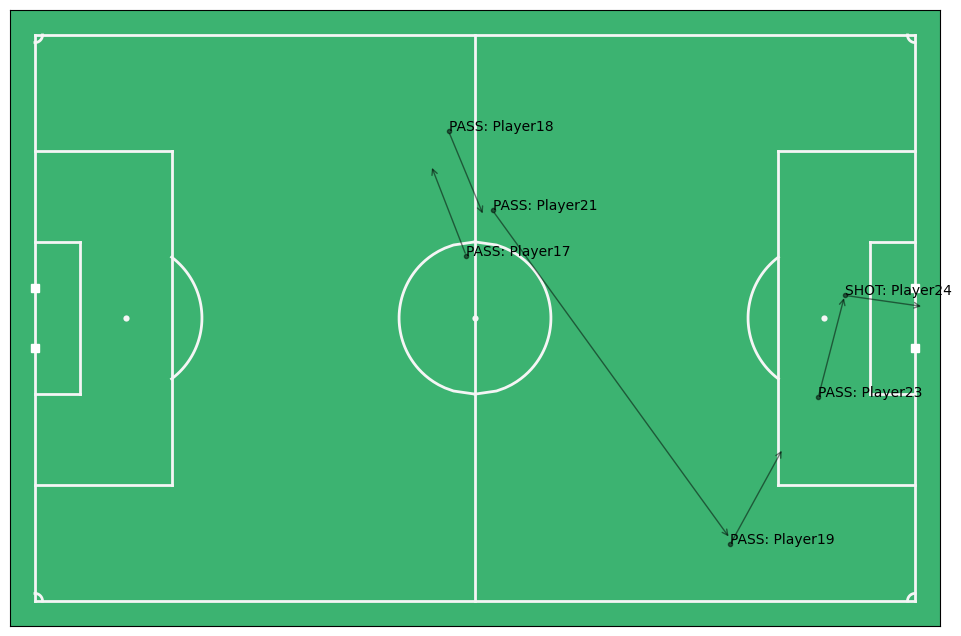

In [115]:
# plot the 3 events leading up to the second goal
plot_events(events.loc[818:823], color='k', indicators = ['Marker','Arrow'], annotate=True );


### Pitch Control Model
The functions and class definitions below are authored and defined by Laurie Shaw on Pitch Control.

Created on Mon Apr 19 14:52:19 2020

Module for calculating a Pitch Control surface using MetricaSports's tracking & event data.

Pitch control (at a given location on the field) is the probability that a team will gain possession if the ball is moved to that location on the field. 

Methdology is described in "Off the ball scoring opportunities" by William Spearman:
[http://www.sloansportsconference.com/wp-content/uploads/2018/02/2002.pdf](http://www.sloansportsconference.com/wp-content/uploads/2018/02/2002.pdf)

GitHub repo for this code can be found here:[https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking)

Data can be found at: [https://github.com/metrica-sports/sample-data](https://github.com/metrica-sports/sample-data)

>**Functions**

calculate_pitch_control_at_target(): calculate the pitch control probability for the attacking and defending teams at a specified target position on the ball.

generate_pitch_control_for_event(): this function evaluates pitch control surface over the entire field at the moment
of the given event (determined by the index of the event passed as an input)

>**Classes**

The 'player' class collects and stores trajectory information for each player required by the pitch control calculations.

@author: Laurie Shaw (@EightyFivePoint)

In [37]:
def initialise_players(team,teamname,params):
    """
    initialise_players(team,teamname,params)
    
    create a list of player objects that holds their positions and velocities from the tracking data dataframe 
    
    Parameters
    -----------
    
    team: row (i.e. instant) of either the home or away team tracking Dataframe
    teamname: team name "Home" or "Away"
    params: Dictionary of model parameters (default model parameters can be generated using default_model_params() )
        
    Returns
    -----------
    
    team_players: list of player objects for the team at at given instant
    
    """    
    # get player  ids
    player_ids = np.unique( [ c.split('_')[1] for c in team.keys() if c[:4] == teamname ] )
    # create list
    team_players = []
    for p in player_ids:
        # create a player object for player_id 'p'
        team_player = player(p,team,teamname,params)
        if team_player.inframe:
            team_players.append(team_player)
    return team_players

In [38]:
class player(object):
    """
    player() class
    
    Class defining a player object that stores position, velocity, time-to-intercept and pitch control contributions for a player
    
    __init__ Parameters
    -----------
    pid: id (jersey number) of player
    team: row of tracking data for team
    teamname: team name "Home" or "Away"
    params: Dictionary of model parameters (default model parameters can be generated using default_model_params() )
    

    methods include:
    -----------
    simple_time_to_intercept(r_final): time take for player to get to target position (r_final) given current position
    probability_intercept_ball(T): probability player will have controlled ball at time T given their expected time_to_intercept
    
    """
        # player object holds position, velocity, time-to-intercept and pitch control contributions for each player
    def __init__(self,pid,team,teamname,params):
        self.id = pid
        self.teamname = teamname
        self.playername = "%s_%s_" % (teamname,pid)
        self.vmax = params['max_player_speed'] # player max speed in m/s. Could be individualised
        self.reaction_time = params['reaction_time'] # player reaction time in 's'. Could be individualised
        self.tti_sigma = params['tti_sigma'] # standard deviation of sigmoid function (see Eq 4 in Spearman, 2018)
        self.get_position(team)
        self.get_velocity(team)
        self.PPCF = 0. # initialise this for later
        
    def get_position(self,team):
        self.position = np.array( [ team[self.playername+'x'], team[self.playername+'y'] ] )
        self.inframe = not np.any( np.isnan(self.position) )
        
    def get_velocity(self,team):
        self.velocity = np.array( [ team[self.playername+'vx'], team[self.playername+'vy'] ] )
        if np.any( np.isnan(self.velocity) ):
            self.velocity = np.array([0.,0.])
    
    def simple_time_to_intercept(self, r_final):
        self.PPCF = 0. # initialise this for later
        # Time to intercept assumes that the player continues moving at current velocity for 'reaction_time' seconds
        # and then runs at full speed to the target position.
        r_reaction = self.position + self.velocity*self.reaction_time
        self.time_to_intercept = self.reaction_time + np.linalg.norm(r_final-r_reaction)/self.vmax
        return self.time_to_intercept

    def probability_intercept_ball(self,T):
        # probability of a player arriving at target location at time 'T' given their expected time_to_intercept (time of arrival), 
        # as described in Spearman 2018
        f = 1/(1. + np.exp( -np.pi/np.sqrt(3.0)/self.tti_sigma * (T-self.time_to_intercept) ) )
        return f

In [39]:
def default_model_params(time_to_control_veto=3):
    """
    default_model_params()
    
    Returns the default parameters that define and evaluate the model. See Spearman 2018 for more details.
    
    Parameters
    -----------
    time_to_control_veto: If the probability that another team or player can get to the ball and control it is 
        less than 10^-time_to_control_veto, ignore that player.
    
    Returns
    -----------
    params: dictionary of parameters required to determine and calculate the model
    
    """
    # key parameters for the model, as described in Spearman 2018
    params = {}
    # model parameters
    params['max_player_accel'] = 7. # maximum player acceleration m/s/s, not used in this implementation
    params['max_player_speed'] = 5. # maximum player speed m/s
    params['reaction_time'] = 0.7 # seconds, time taken for player to react and change trajectory. Roughly determined as vmax/amax
    params['tti_sigma'] = 0.45 # Standard deviation of sigmoid function in Spearman 2018 ('s') that determines uncertainty in player arrival time
    params['kappa_def'] =  1. # kappa parameter in Spearman 2018 (=1.72 in the paper) which gives the advantage defending players to control ball;
    # I have set to 1 so that home & away players have same ball control probability
    params['lambda_att'] = 4.3 # ball control parameter for attacking team
    params['lambda_def'] = 4.3 * params['kappa_def'] # ball control parameter for defending team
    params['average_ball_speed'] = 15. # average ball travel speed in m/s
    
    # numerical parameters for model evaluation
    params['int_dt'] = 0.04 # integration timestep (dt)
    params['max_int_time'] = 10 # upper limit on integral time
    params['model_converge_tol'] = 0.01 # assume convergence when PPCF>0.99 at a given location.
    
    # The following are 'short-cut' parameters. We do not need to calculated PPCF explicitly when a player has a sufficient head start. 
    # A sufficient head start is when the a player arrives at the target location at least 'time_to_control' seconds before the next player
    params['time_to_control_att'] = time_to_control_veto*np.log(10) * (np.sqrt(3)*params['tti_sigma']/np.pi + 1/params['lambda_att'])
    params['time_to_control_def'] = time_to_control_veto*np.log(10) * (np.sqrt(3)*params['tti_sigma']/np.pi + 1/params['lambda_def'])
    return params

In [40]:
def generate_pitch_control_for_event(event_id, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50):
    """ generate_pitch_control_for_event
    
    Evaluates pitch control surface over the entire field at the moment of the given event (determined by the index of the event passed as an input)
    
    Parameters
    -----------
        event_id: Index (not row) of the event that describes the instant at which the pitch control surface should be calculated
        events: Dataframe containing the event data
        tracking_home: tracking DataFrame for the Home team
        tracking_away: tracking DataFrame for the Away team
        params: Dictionary of model parameters (default model parameters can be generated using default_model_params() )
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        n_grid_cells_x: Number of pixels in the grid (in the x-direction) that covers the surface. Default is 50.
                        n_grid_cells_y will be calculated based on n_grid_cells_x and the field dimensions
        
    Returrns
    -----------
        PPCFa: Pitch control surface (dimen (n_grid_cells_x,n_grid_cells_y) ) containing pitch control probability for the attcking team.
               Surface for the defending team is just 1-PPCFa.
        xgrid: Positions of the pixels in the x-direction (field length)
        ygrid: Positions of the pixels in the y-direction (field width)

    """
    # get the details of the event (frame, team in possession, ball_start_position)
    pass_frame = events.loc[event_id]['Start Frame']
    pass_team = events.loc[event_id].Team
    ball_start_pos = np.array([events.loc[event_id]['Start X'],events.loc[event_id]['Start Y']])
    
    # break the pitch down into a grid
    n_grid_cells_y = int(n_grid_cells_x*field_dimen[1]/field_dimen[0])
    xgrid = np.linspace( -field_dimen[0]/2., field_dimen[0]/2., n_grid_cells_x)
    ygrid = np.linspace( -field_dimen[1]/2., field_dimen[1]/2., n_grid_cells_y )
    
    # initialise pitch control grids for attacking and defending teams 
    PPCFa = np.zeros( shape = (len(ygrid), len(xgrid)) )
    PPCFd = np.zeros( shape = (len(ygrid), len(xgrid)) )
    
    # initialise player positions and velocities for pitch control calc (so that we're not repeating this at each grid cell position)
    if pass_team=='Home':
        attacking_players = initialise_players(tracking_home.loc[pass_frame],'Home',params)
        defending_players = initialise_players(tracking_away.loc[pass_frame],'Away',params)
    elif pass_team=='Away':
        defending_players = initialise_players(tracking_home.loc[pass_frame],'Home',params)
        attacking_players = initialise_players(tracking_away.loc[pass_frame],'Away',params)
    else:
        assert False, "Team in possession must be either home or away"
    
    # calculate pitch pitch control model at each location on the pitch
    for i in range( len(ygrid) ):
        for j in range( len(xgrid) ):
            target_position = np.array( [xgrid[j], ygrid[i]] )
            PPCFa[i,j],PPCFd[i,j] = calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params)
    
    # check probabilitiy sums within convergence
    checksum = np.sum( PPCFa + PPCFd ) / float(n_grid_cells_y*n_grid_cells_x ) 
    assert 1-checksum < params['model_converge_tol'], "Checksum failed: %1.3f" % (1-checksum)
    return PPCFa,xgrid,ygrid

In [41]:
def calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params):
    """ calculate_pitch_control_at_target
        Calculates the pitch control probability for the attacking and defending teams at a specified target position on the ball.
    
    Parameters
    -----------
        target_position: size 2 numpy array containing the (x,y) position of the position on the field to evaluate pitch control
        attacking_players: list of 'player' objects (see player class above) for the players on the attacking team (team in possession)
        defending_players: list of 'player' objects (see player class above) for the players on the defending team
        ball_start_pos: Current position of the ball (start position for a pass). If set to NaN, function will assume that the ball is 
            already at the target position.
        params: Dictionary of model parameters (default model parameters can be generated using default_model_params() )
        
    Returrns
    -----------
        PPCFatt: Pitch control probability for the attacking team
        PPCFdef: Pitch control probability for the defending team ( 1-PPCFatt-PPCFdef <  params['model_converge_tol'] )

    """
    # calculate ball travel time from start position to end position.
    if ball_start_pos is None or any(np.isnan(ball_start_pos)): # assume that ball is already at location
        ball_travel_time = 0.0 
    else:
        # ball travel time is distance to target position from current ball position divided assumed average ball speed
        ball_travel_time = np.linalg.norm( target_position - ball_start_pos )/params['average_ball_speed']
    
    # first get arrival time of 'nearest' attacking player (nearest also dependent on current velocity)
    tau_min_att = np.nanmin( [p.simple_time_to_intercept(target_position) for p in attacking_players] )
    tau_min_def = np.nanmin( [p.simple_time_to_intercept(target_position ) for p in defending_players] )
    
    # check whether we actually need to solve equation 3
    if tau_min_att-max(ball_travel_time,tau_min_def) >= params['time_to_control_def']:
        # if defending team can arrive significantly before attacking team, no need to solve pitch control model
        return 0., 1.
    elif tau_min_def-max(ball_travel_time,tau_min_att) >= params['time_to_control_att']:
        # if attacking team can arrive significantly before defending team, no need to solve pitch control model
        return 1., 0.
    else: 
        # solve pitch control model by integrating equation 3 in Spearman et al.
        # first remove any player that is far (in time) from the target location
        attacking_players = [p for p in attacking_players if p.time_to_intercept-tau_min_att < params['time_to_control_att'] ]
        defending_players = [p for p in defending_players if p.time_to_intercept-tau_min_def < params['time_to_control_def'] ]
        
        # set up integration arrays
        dT_array = np.arange(ball_travel_time-params['int_dt'],ball_travel_time+params['max_int_time'],params['int_dt']) 
        PPCFatt = np.zeros_like( dT_array )
        PPCFdef = np.zeros_like( dT_array )
        
        # integration equation 3 of Spearman 2018 until convergence or tolerance limit hit (see 'params')
        ptot = 0.0
        i = 1
        
        while 1-ptot>params['model_converge_tol'] and i<dT_array.size: 
            T = dT_array[i]
            for player in attacking_players:
                # calculate ball control probablity for 'player' in time interval T+dt
                dPPCFdT = (1-PPCFatt[i-1]-PPCFdef[i-1])*player.probability_intercept_ball( T ) * params['lambda_att']
                # make sure it's greater than zero
                assert dPPCFdT>=0, 'Invalid attacking player probability (calculate_pitch_control_at_target)'
                player.PPCF += dPPCFdT*params['int_dt'] # total contribution from individual player
                PPCFatt[i] += player.PPCF # add to sum over players in the attacking team (remembering array element is zero at the start of each integration iteration)
            for player in defending_players:
                # calculate ball control probablity for 'player' in time interval T+dt
                dPPCFdT = (1-PPCFatt[i-1]-PPCFdef[i-1])*player.probability_intercept_ball( T ) * params['lambda_def']
                # make sure it's greater than zero
                assert dPPCFdT>=0, 'Invalid defending player probability (calculate_pitch_control_at_target)'
                player.PPCF += dPPCFdT*params['int_dt'] # total contribution from individual player
                PPCFdef[i] += player.PPCF # add to sum over players in the defending team
            ptot = PPCFdef[i]+PPCFatt[i] # total pitch control probability 
            i += 1
        if i>=dT_array.size:
            print("Integration failed to converge: %1.3f" % (ptot) )
        return PPCFatt[i-1], PPCFdef[i-1]

### Bringing it all together
Plotting the results of running the pitch control model.

In [42]:
# first get model parameters
params = default_model_params(3)

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

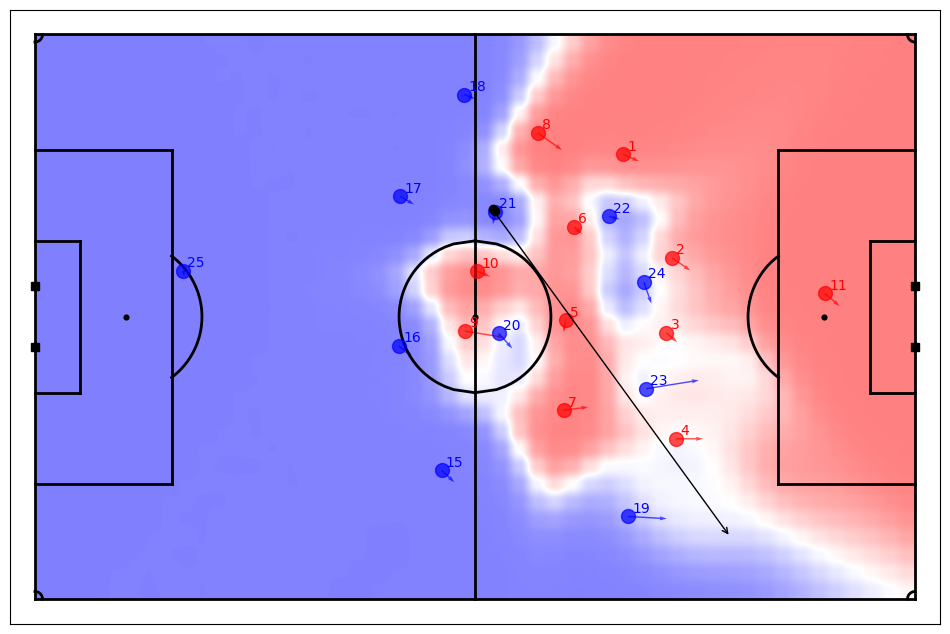

In [43]:

# evaluated pitch control surface for first pass
PPCF,xgrid,ygrid = generate_pitch_control_for_event(820, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(820, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

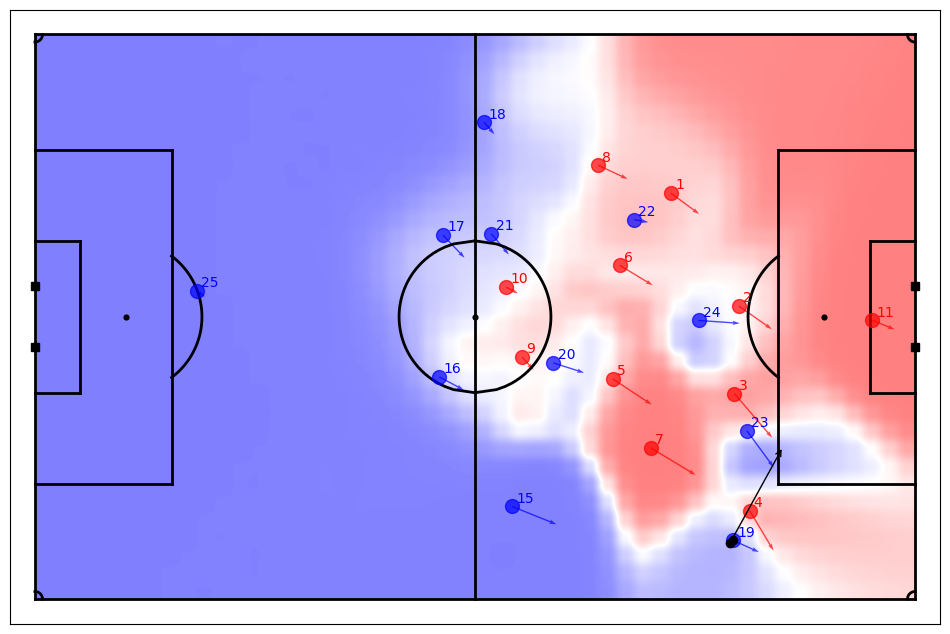

In [44]:
# evaluated pitch control surface for second pass
PPCF,xgrid,ygrid = generate_pitch_control_for_event(821, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event( 821, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


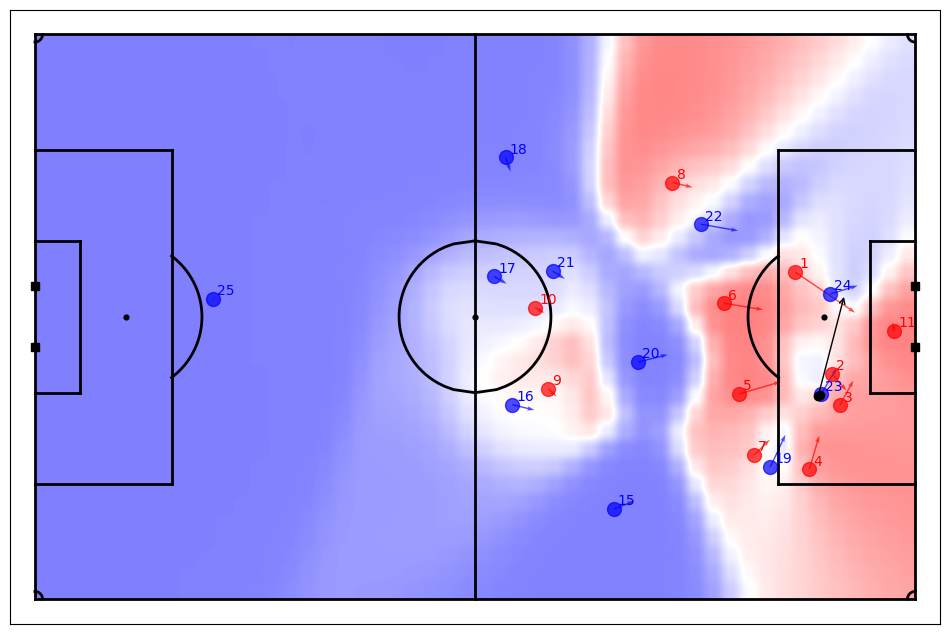

In [45]:
# evaluated pitch control surface for third pass
PPCF,xgrid,ygrid = generate_pitch_control_for_event(822, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event( 822, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True );

In [46]:
goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,-47.70,1.36,-54.06,2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,40.28,1.36,55.12,2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,-30.74,5.44,-54.06,2.72


In [56]:
events.loc[190:198]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
190,Home,PASS,NaN,1,11647,465.88,11685,467.40,Player7,Player10,-13.78,-0.68,-21.20,-0.00
191,Home,PASS,NaN,1,11685,467.40,11703,468.12,Player10,Player5,-21.20,-0.00,-18.02,4.08
192,Home,PASS,NaN,1,11721,468.84,11744,469.76,Player5,Player9,-20.14,4.08,-30.74,7.48
193,Home,PASS,NaN,1,11810,472.40,11885,475.40,Player9,Player8,-32.86,0.68,-39.22,-25.16
194,Home,PASS,NaN,1,11958,478.32,11976,479.04,Player8,Player9,-41.34,-24.48,-42.40,-14.96
195,Home,PASS,NaN,1,11976,479.04,11994,479.76,Player9,Player8,-42.40,-14.96,-38.16,-20.40
196,Home,PASS,NaN,1,12069,482.76,12146,485.84,Player8,Player1,-28.62,-7.48,-37.10,23.80
197,Home,PASS,CROSS,1,12180,487.20,12202,488.08,Player1,Player10,-40.28,19.72,-47.70,-3.40
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04


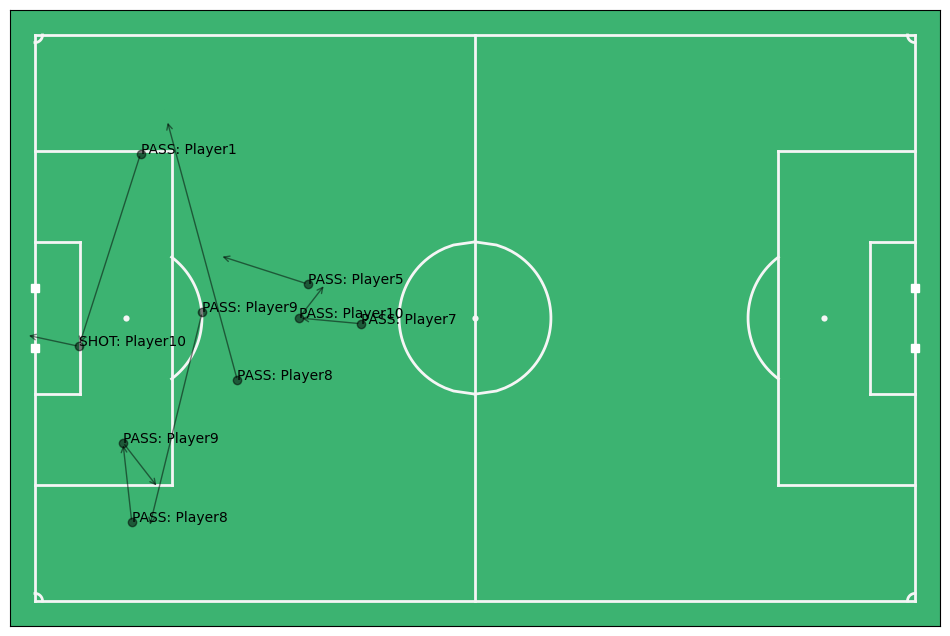

In [57]:
# plot the 3 events leading up to the second goal
plot_events(events.loc[190:198], color='k', indicators = ['Marker','Arrow'], annotate=True );


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

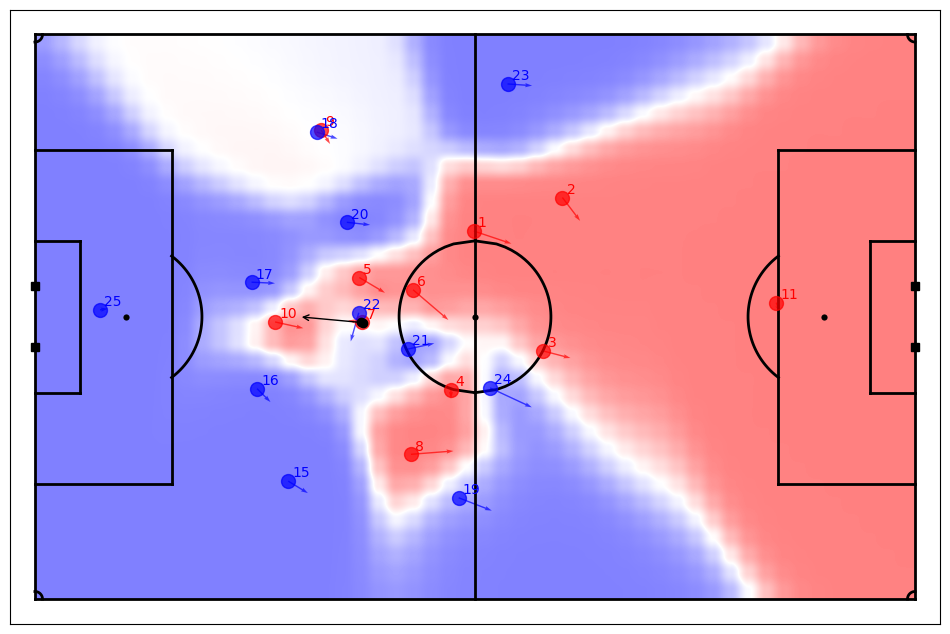

In [60]:
# evaluated pitch control surface for 1st goal at event rec 198
eve_ind = 190

PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

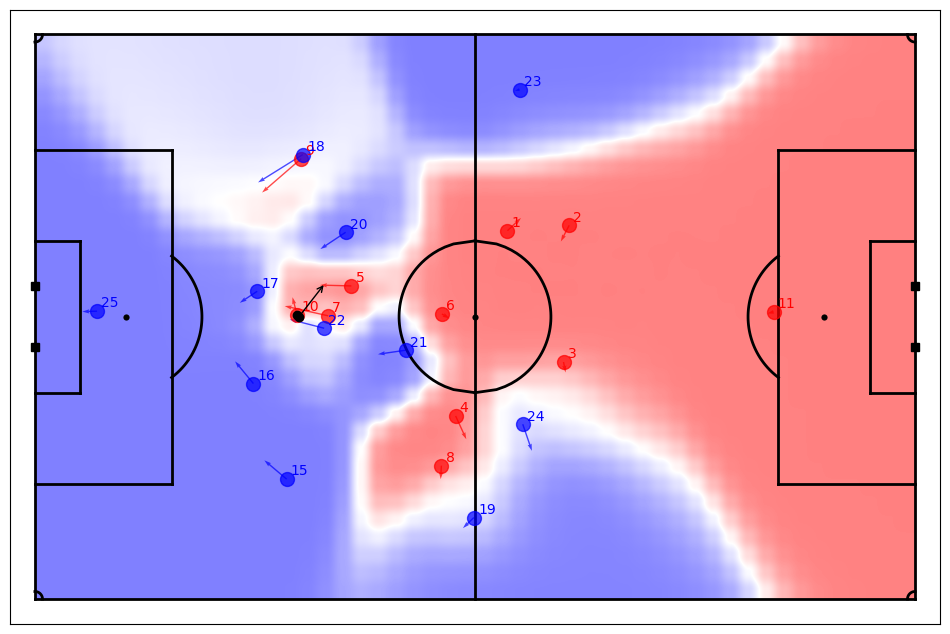

In [61]:
# evaluated pitch control surface for 1st goal at event rec 198
eve_ind = 191

PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

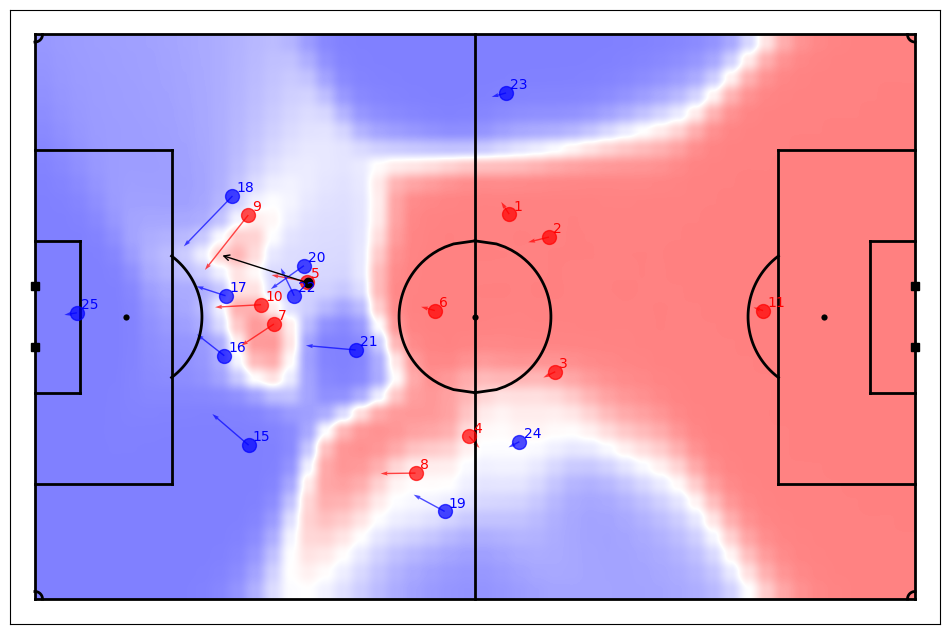

In [62]:
# evaluated pitch control surface for 1st goal at event rec 198
eve_ind = 192

PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

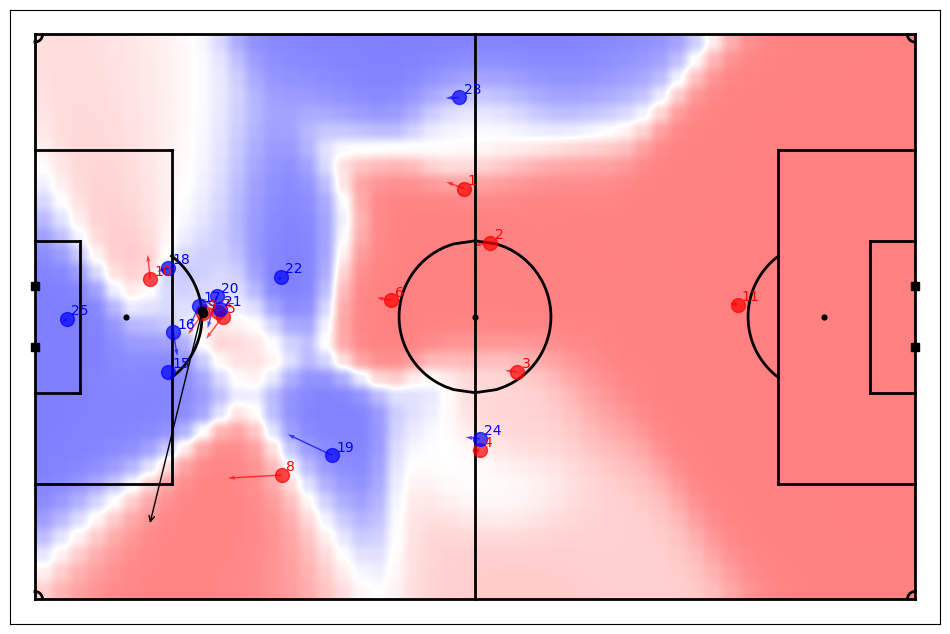

In [63]:
# evaluated pitch control surface for 1st goal at event rec 198
eve_ind = 193

PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

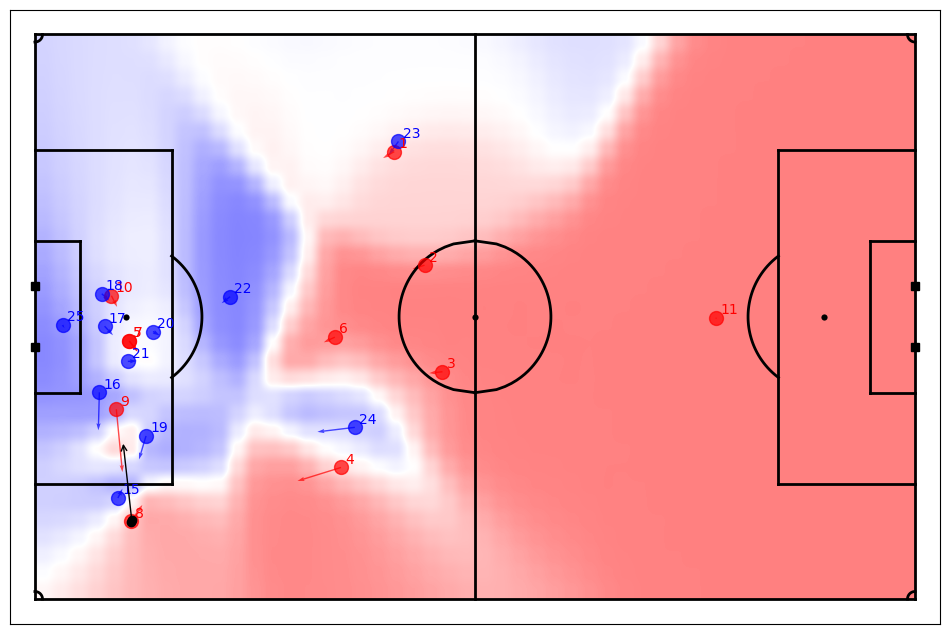

In [64]:
# evaluated pitch control surface for 1st goal at event rec 198
eve_ind = 194

PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

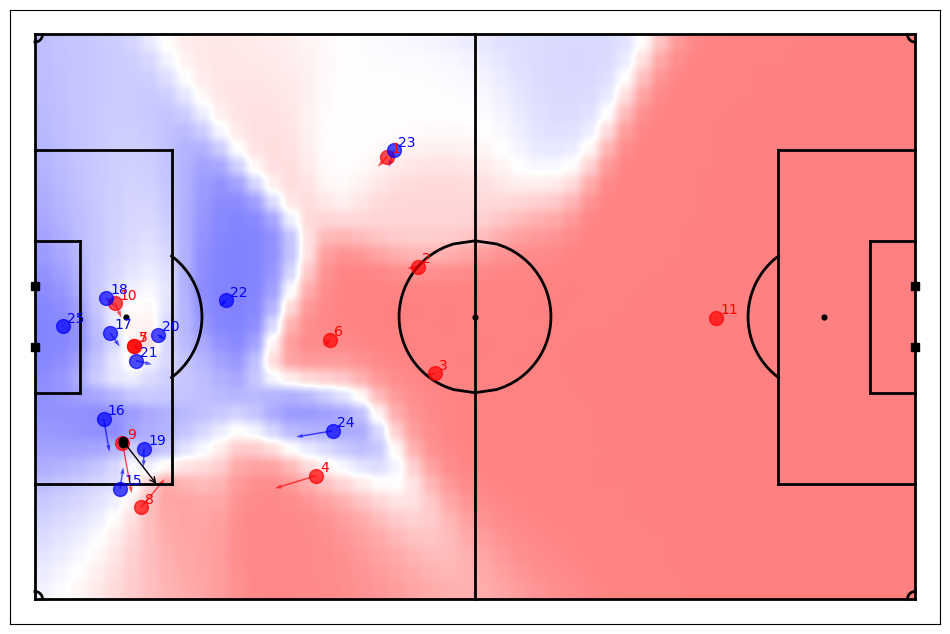

In [65]:
# evaluated pitch control surface for 1st goal at event rec 198
eve_ind = 195

PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

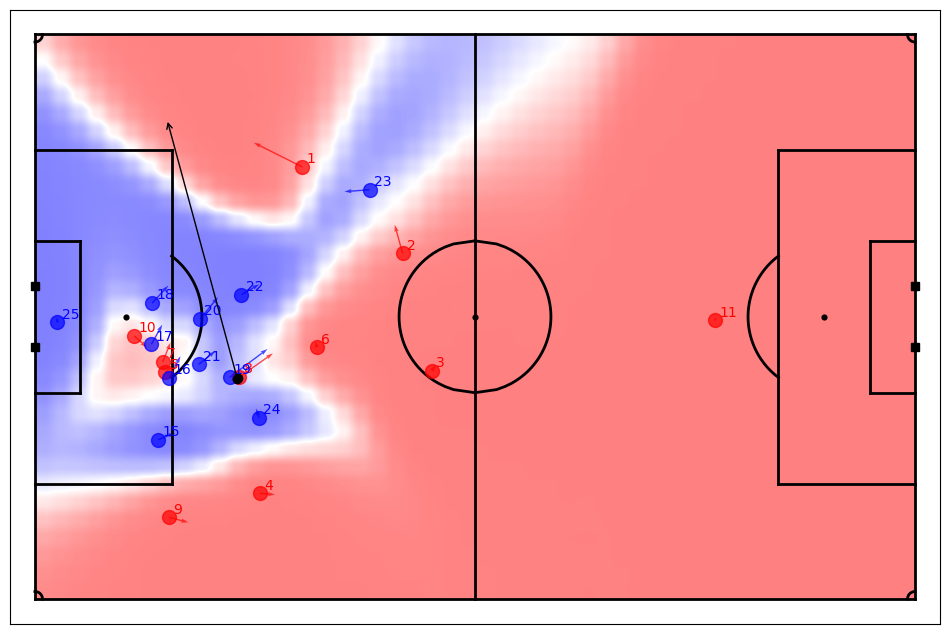

In [66]:
# evaluated pitch control surface for 1st goal at event rec 198
eve_ind = 196

PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

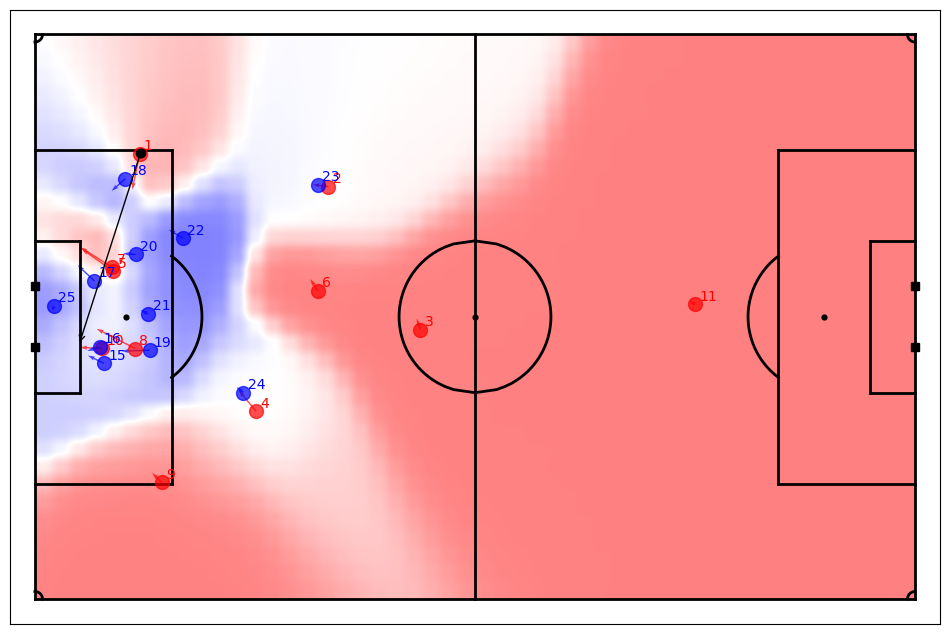

In [67]:
# evaluated pitch control surface for 1st goal at event rec 198
eve_ind = 197

PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

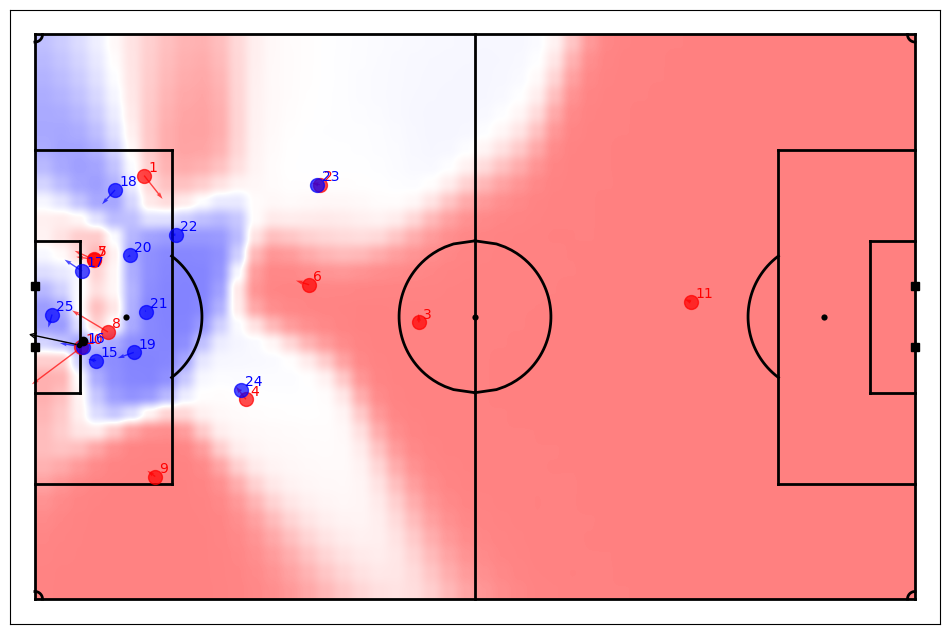

In [116]:
# evaluated pitch control surface for 1st goal at event rec 198
eve_ind = 198

PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True )


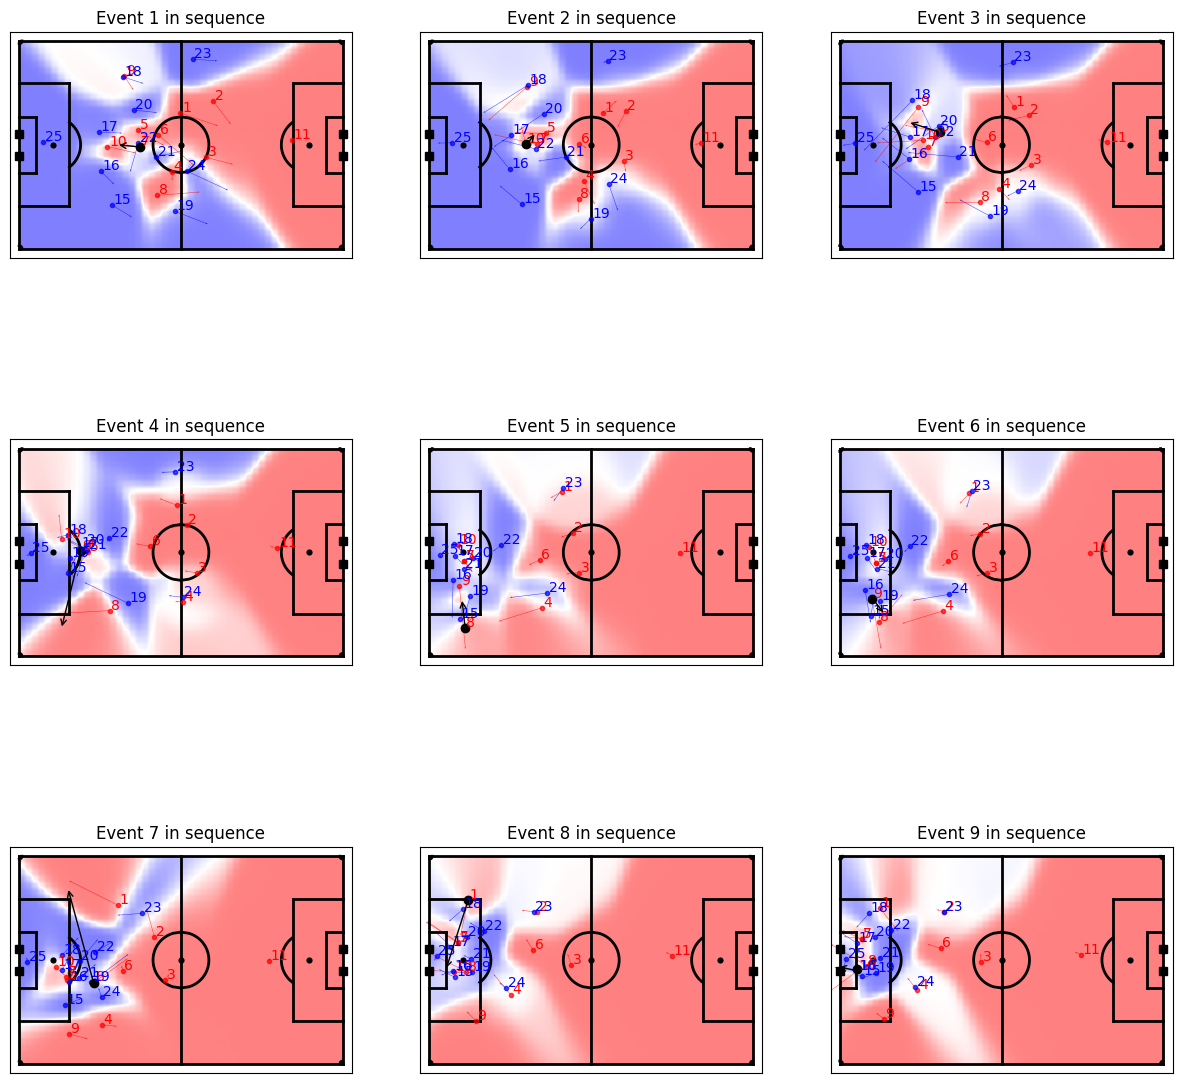

In [125]:
fig,ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
# axes.spines['top'].set_visible(False)
for i in range(0,3):
    for j in range(0,3):
        eve_ind = 190+i*9//3+j
        PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
        plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True, ax=ax[i,j], PlayerMarkerSize=3)
        ax[i,j].set_title(f'Event {eve_ind-189} in sequence')

In [126]:
events.loc[817:823]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
817,Away,RECOVERY,INTERCEPTION,1,52694,2107.76,52694,2107.76,Player17,NaN,-1.06,6.80,NaN,NaN
818,Away,PASS,HEAD,1,52696,2107.84,52746,2109.84,Player17,Player18,-1.06,7.48,-5.30,18.36
819,Away,PASS,NaN,1,52784,2111.36,52807,2112.28,Player18,Player21,-3.18,22.44,1.06,12.24
820,Away,PASS,NaN,1,52871,2114.84,52936,2117.44,Player21,Player19,2.12,12.92,30.74,-26.52
821,Away,PASS,NaN,1,52941,2117.64,52971,2118.84,Player19,Player23,30.74,-27.20,37.10,-15.64
822,Away,PASS,NaN,1,53027,2121.08,53045,2121.80,Player23,Player24,41.34,-9.52,44.52,2.72
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36


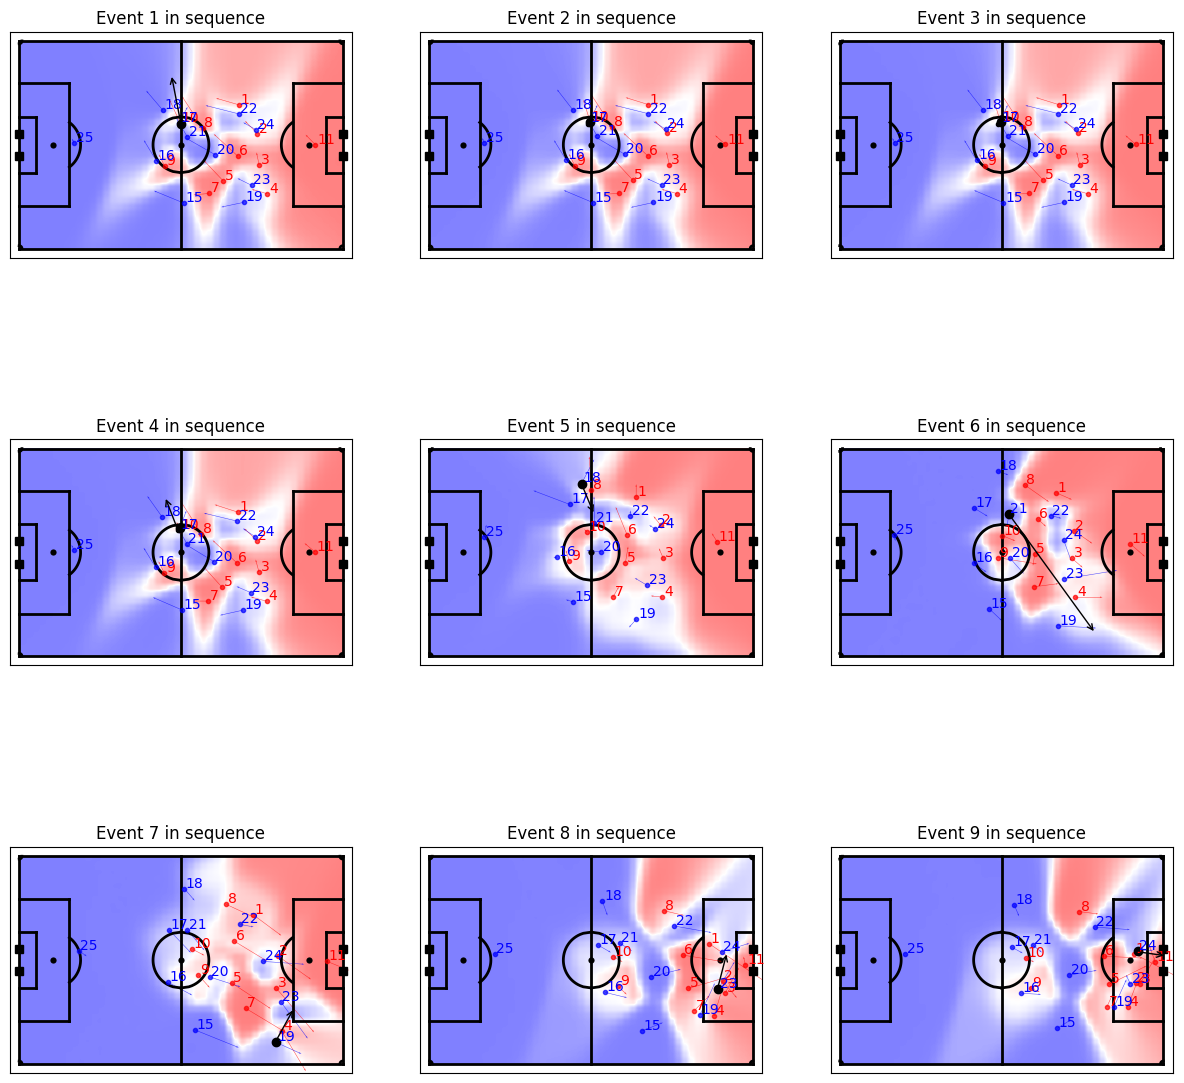

In [127]:
fig,ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
# axes.spines['top'].set_visible(False)
for i in range(0,3):
    for j in range(0,3):
        eve_ind = 815+i*9//3+j
        PPCF,xgrid,ygrid = generate_pitch_control_for_event(eve_ind, events, tracking_home, tracking_away, params, field_dimen = (106.,68.,), n_grid_cells_x = 50)
        plot_pitchcontrol_for_event(eve_ind, events,  tracking_home, tracking_away, PPCF, xgrid, ygrid, annotate=True, ax=ax[i,j], PlayerMarkerSize=3)
        ax[i,j].set_title(f'Event {eve_ind-814} in sequence')